**Importing relevant libraries**

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading data**

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CWC23_all_innings.csv')
print(data.head())


  team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   

   wicketball_prob  runs_per_ball      opposition     ground start_date  \
0             0.05       0.750000  v South Africa    Chennai  27-Oct-23   
1             0.05       0.750000         v India    Lucknow  29-Oct-23   
2             0.05       0.800000       v England  Ahmedabad   5-Oct-23   
3             0.05       0.816667    v Bangladesh    Chennai  13-Oct-23   
4             0.05       0.816667      v Pakistan    Chennai  23-Oct-23   

   overs  mdns  econ  inns  4s  6s  sr  not_out  mins  
0   10.0   0.0   4.5     2 NaN NaN NaN      NaN   NaN  
1   10.0   2.0   4.5     1 N

In [ ]:
# Checking for missing values
print(data.isnull().sum())

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64


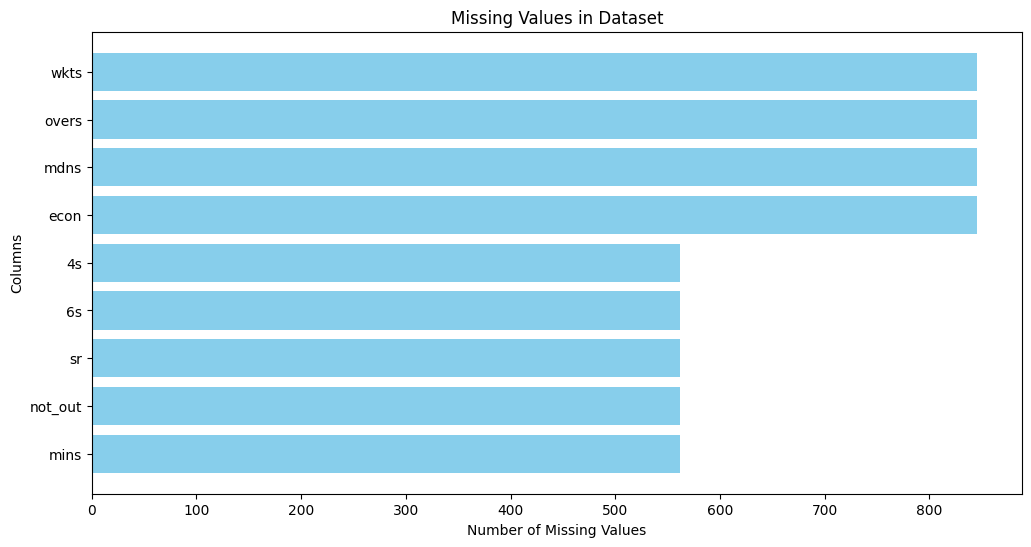

In [ ]:
# Plotting missing values
missing_values = {
    'wkts': 846,
    'overs': 846,
    'mdns': 846,
    'econ': 846,
    '4s': 562,
    '6s': 562,
    'sr': 562,
    'not_out': 562,
    'mins': 562
}

# Creating a bar plot
plt.figure(figsize=(12, 6))
plt.barh(list(missing_values.keys()), list(missing_values.values()), color='skyblue')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values in Dataset')
plt.gca().invert_yaxis()
plt.show()


**Imputing the missing values (Numerical Columns)**


In [ ]:

# Imputing the missing values for numerical columns with their mean
numerical_cols = ['wkts', 'overs', 'mdns', 'econ', '4s', '6s', 'sr', 'not_out', 'mins']
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())


**Imputing the missing values (Categorical Columns)**


In [ ]:
# Imputing the missing values for categorical columns with their mode
categorical_cols = ['team', 'player', 'bat_or_bowl', 'opposition', 'ground', 'start_date']
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [ ]:

# Checking if there are any remaining missing values
print(data.isnull().sum())

team               0
player             0
bat_or_bowl        0
bb_bf              0
runs               0
wkts               0
wicketball_prob    0
runs_per_ball      0
opposition         0
ground             0
start_date         0
overs              0
mdns               0
econ               0
inns               0
4s                 0
6s                 0
sr                 0
not_out            0
mins               0
dtype: int64


*Dataset Information*

In [ ]:
# Dataset's information (e.g., column names and their data types)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             1408 non-null   float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            1408 non-null   float64
 12  mdns             1408 non-null   float64
 13  econ             1408 non-null   float64
 14  inns             1408 non-null   int64  
 15  4s               1408 non-null   float64
 16  6s               1408 non-null   float64
 17  sr            

In [ ]:
df = pd.DataFrame(data)
print(df.columns)

Index(['team', 'player', 'bat_or_bowl', 'bb_bf', 'runs', 'wkts',
       'wicketball_prob', 'runs_per_ball', 'opposition', 'ground',
       'start_date', 'overs', 'mdns', 'econ', 'inns', '4s', '6s', 'sr',
       'not_out', 'mins'],
      dtype='object')


**Team Performance Analysis**

In [ ]:
# Calculating thee total runs scored, total wickets taken, and average runs per ball for each team
team_performance = data.groupby('team').agg({'runs': 'sum', 'wkts': 'sum', 'runs_per_ball': 'mean'}).reset_index()



In [ ]:
# Sorting teams based on total runs scored
top_teams_by_runs = team_performance.sort_values(by='runs', ascending=False)



In [ ]:
# Sorting teams based on total wickets taken
top_teams_by_wickets = team_performance.sort_values(by='wkts', ascending=False)



In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df['runs'], df['wkts'], alpha=0.5)
plt.xlabel('Runs')
plt.ylabel('Wickets')
plt.title('Runs vs Wickets')
plt.show()


*Top team by runs*

In [ ]:

print("Top teams by runs scored:")
print(top_teams_by_runs.head())



Top teams by runs scored:
  team  runs        wkts  runs_per_ball
6   NZ  5376  168.574733       1.000762
1  AUS  5234  189.030249       0.890978
8   SA  5097  192.802491       0.970307
7  PAK  4786  156.551601       0.933415
4  IND  4783  173.505338       0.920735


Top team by runs

In [ ]:
print("\nTop teams by wickets taken:")
print(top_teams_by_wickets.head())


Top teams by wickets taken:
  team  runs        wkts  runs_per_ball
8   SA  5097  192.802491       0.970307
1  AUS  5234  189.030249       0.890978
3  ENG  4396  183.053381       0.935399
5  NED  4268  181.053381       0.809495
4  IND  4783  173.505338       0.920735


In [ ]:
# Analyzing the distribution of 'bat_or_bowl' values for top-performing teams
def analyze_batting_bowling_style(top_teams_df):
    for team in top_teams_df['team']:
        team_players = df[df['team'] == team]
        print(f"\n{team} Batting/Bowling Style:")
        print(team_players['bat_or_bowl'].value_counts())

analyze_batting_bowling_style(top_teams_by_runs)
analyze_batting_bowling_style(top_teams_by_wickets)

# Analyzing the individual player performance within each top-performing team
def analyze_player_performance(top_teams_df):
    for team in top_teams_df['team']:
        team_players = df[df['team'] == team]
        print(f"\n{team} Player Performance:")
        print(team_players)

analyze_player_performance(top_teams_by_runs)
analyze_player_performance(top_teams_by_wickets)




NZ Batting/Bowling Style:
bat     81
bowl    63
Name: bat_or_bowl, dtype: int64

AUS Batting/Bowling Style:
bat     93
bowl    62
Name: bat_or_bowl, dtype: int64

SA Batting/Bowling Style:
bat     87
bowl    54
Name: bat_or_bowl, dtype: int64

PAK Batting/Bowling Style:
bat     76
bowl    52
Name: bat_or_bowl, dtype: int64

IND Batting/Bowling Style:
bat     66
bowl    58
Name: bat_or_bowl, dtype: int64

ENG Batting/Bowling Style:
bat     98
bowl    53
Name: bat_or_bowl, dtype: int64

SL Batting/Bowling Style:
bat     84
bowl    54
Name: bat_or_bowl, dtype: int64

BAN Batting/Bowling Style:
bat     89
bowl    52
Name: bat_or_bowl, dtype: int64

NED Batting/Bowling Style:
bat     98
bowl    59
Name: bat_or_bowl, dtype: int64

AFG Batting/Bowling Style:
bat     74
bowl    55
Name: bat_or_bowl, dtype: int64

SA Batting/Bowling Style:
bat     87
bowl    54
Name: bat_or_bowl, dtype: int64

AUS Batting/Bowling Style:
bat     93
bowl    62
Name: bat_or_bowl, dtype: int64

ENG Batting/Bowling

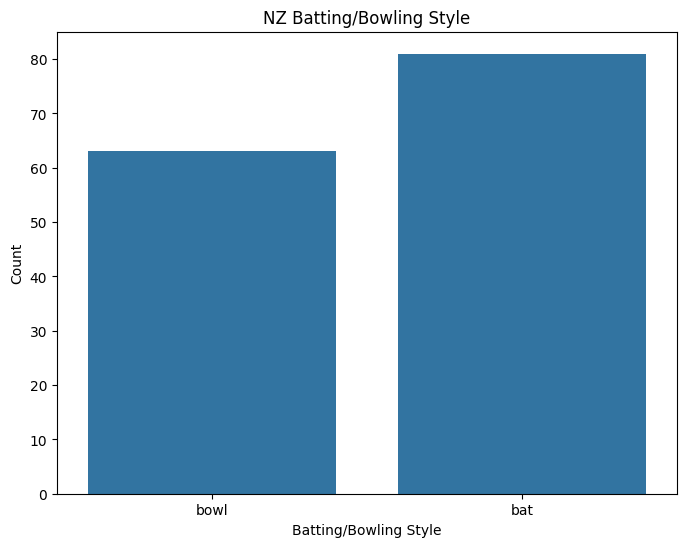

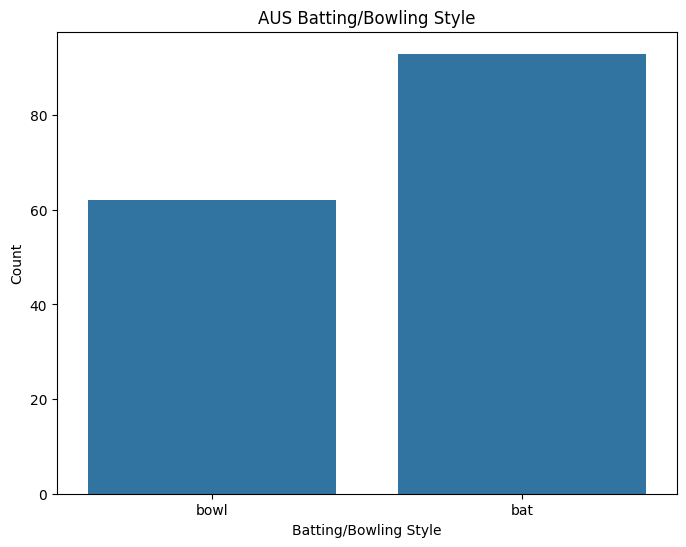

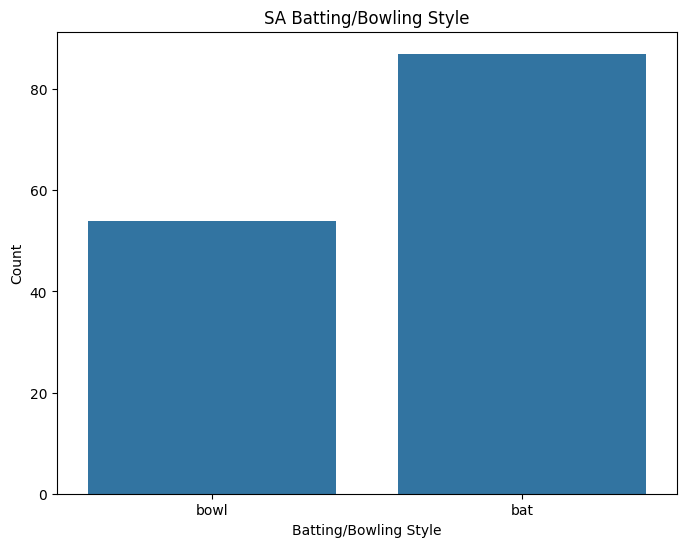

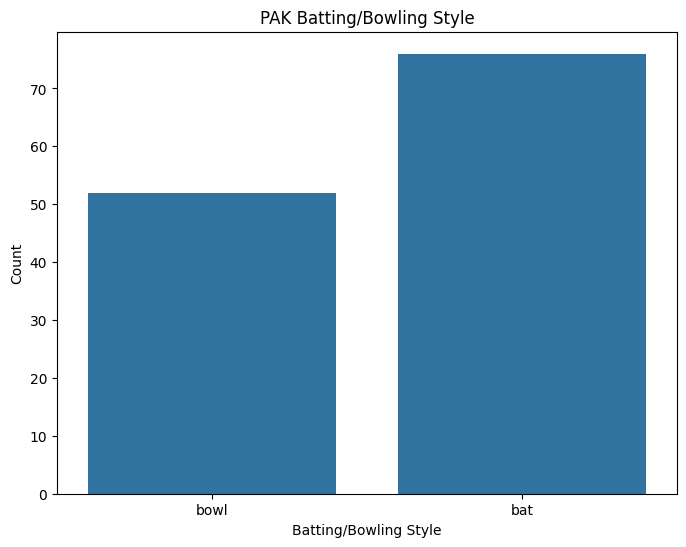

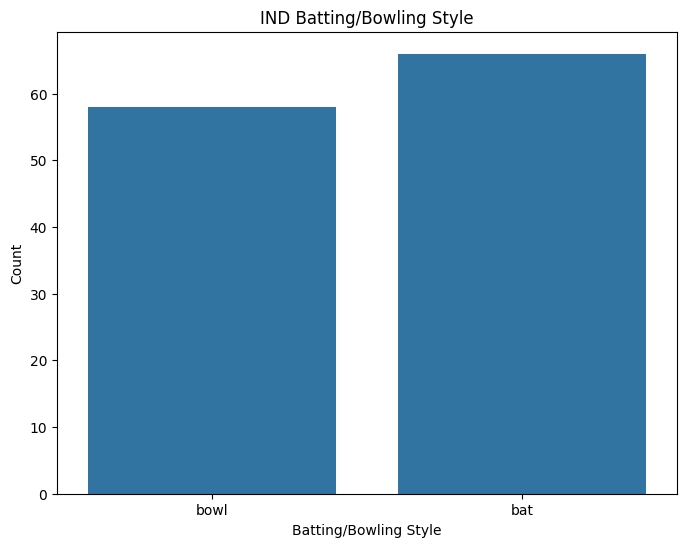

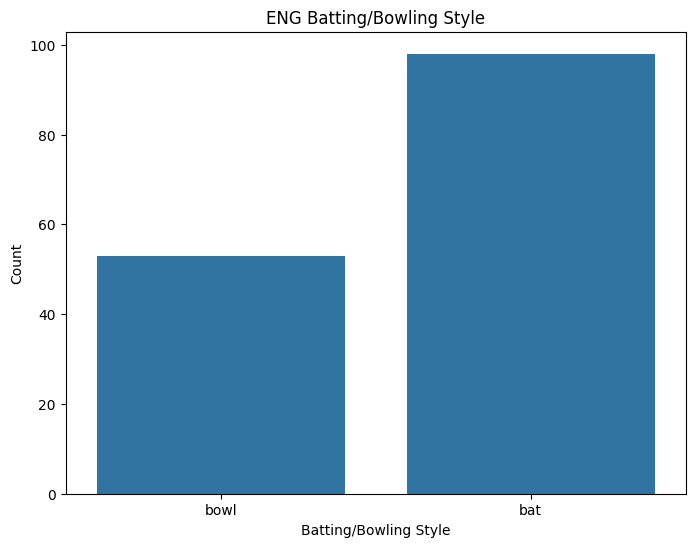

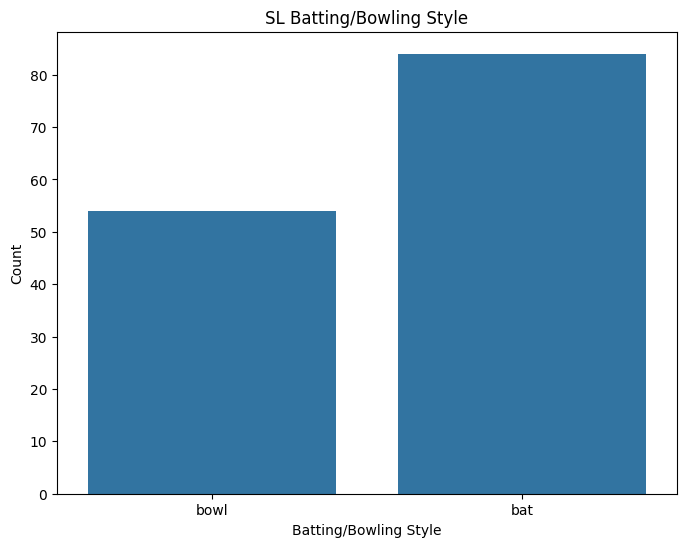

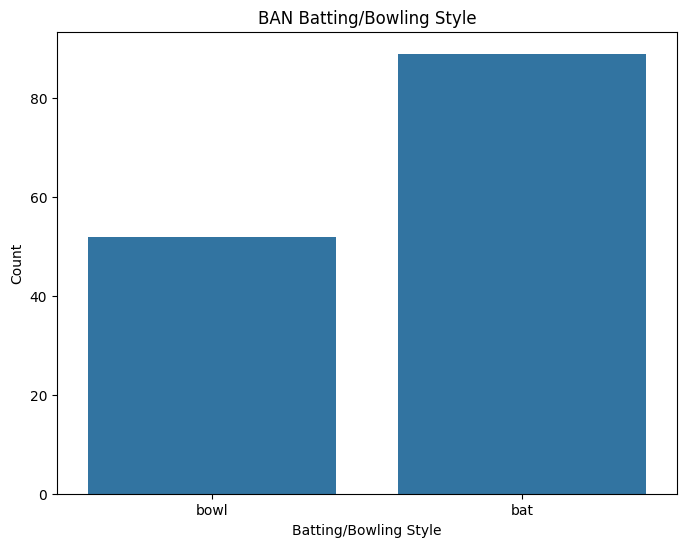

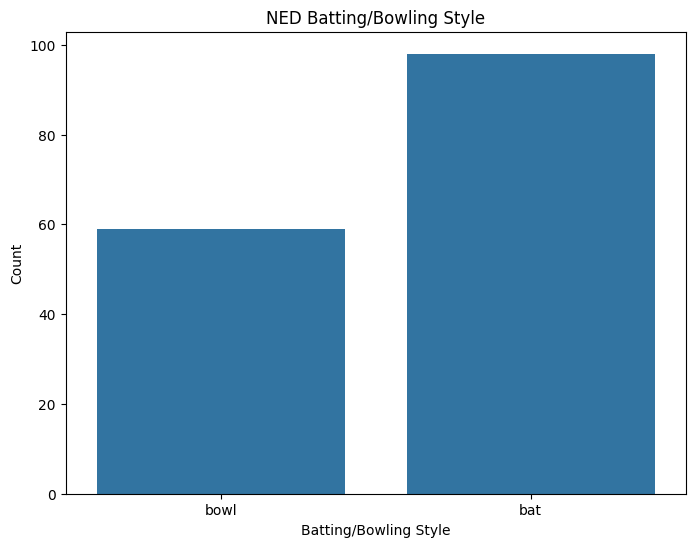

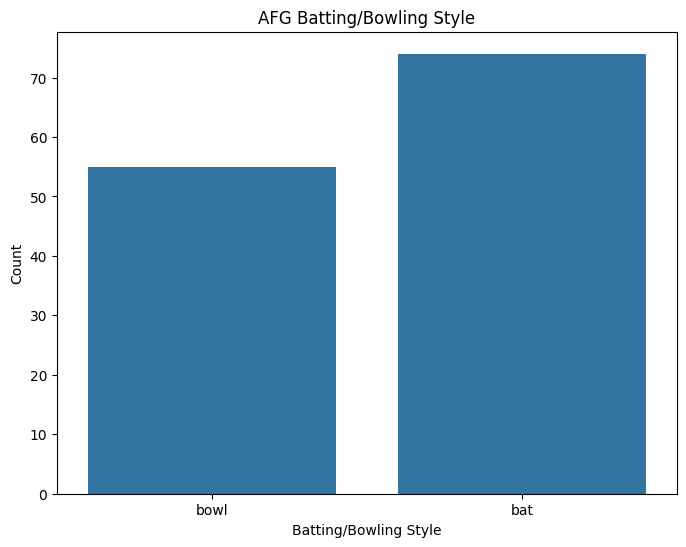

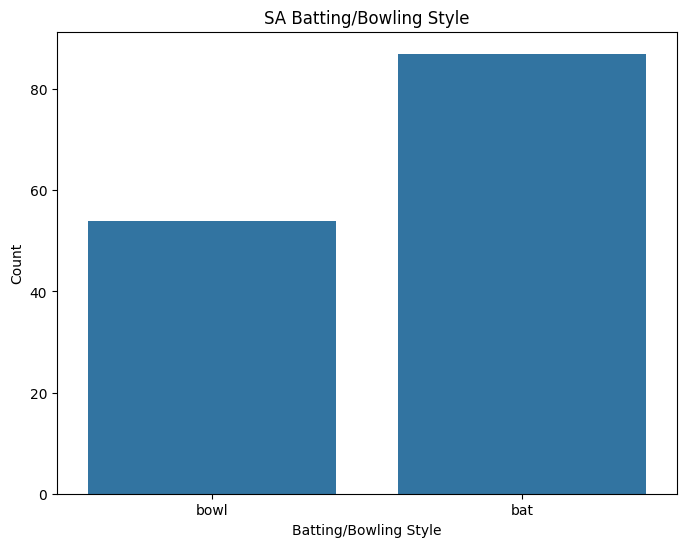

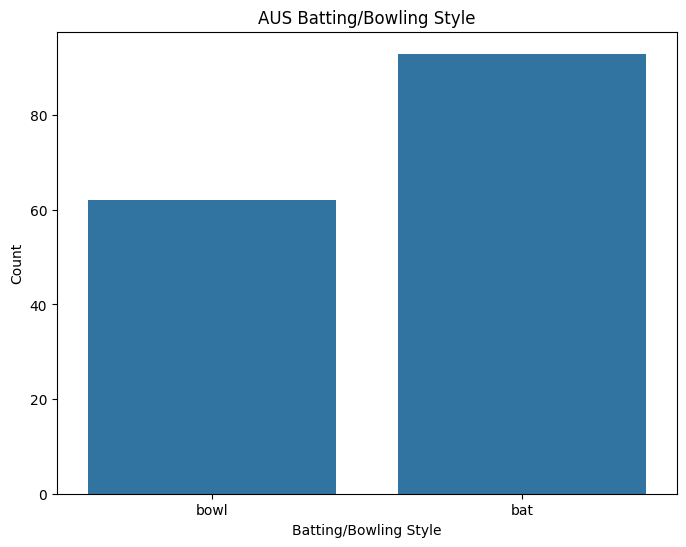

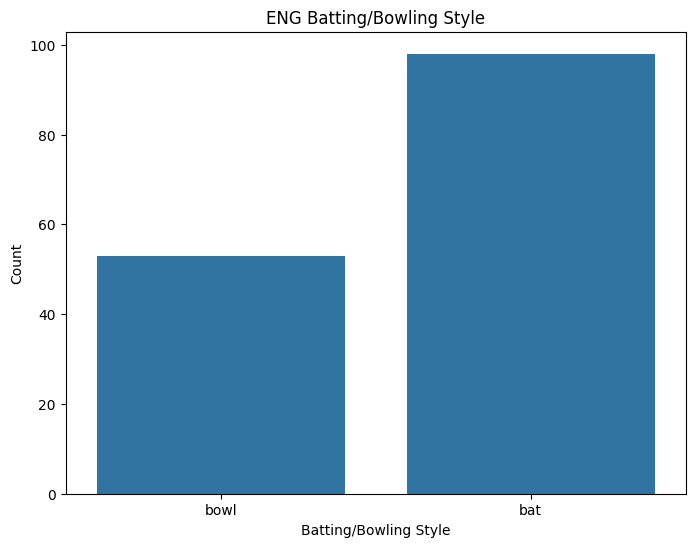

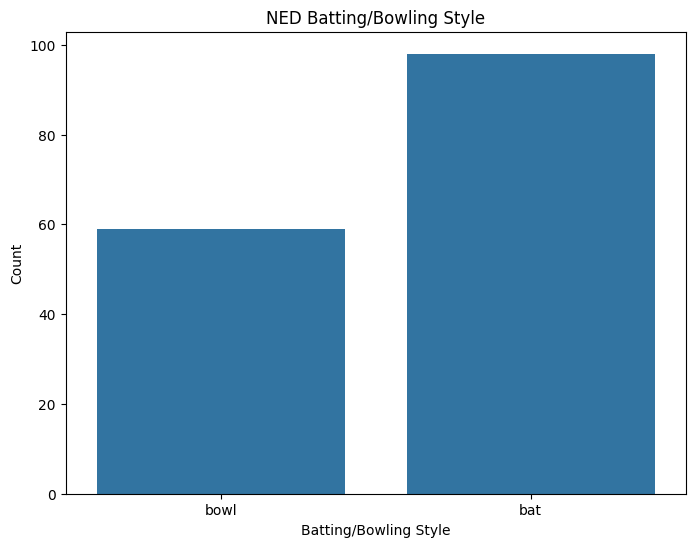

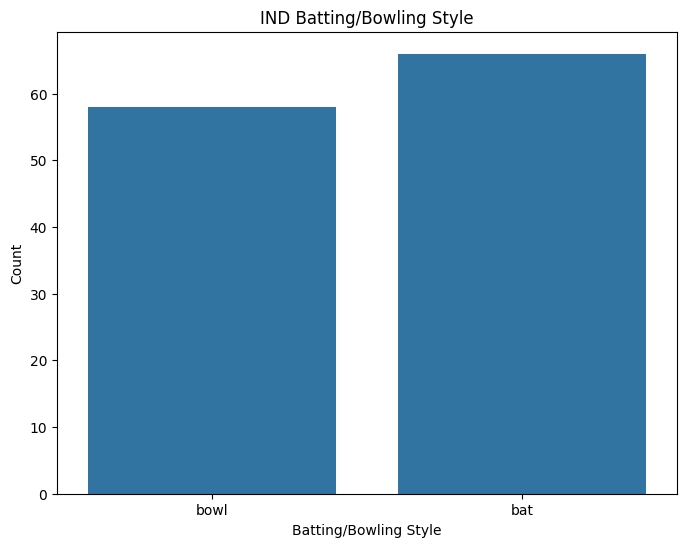

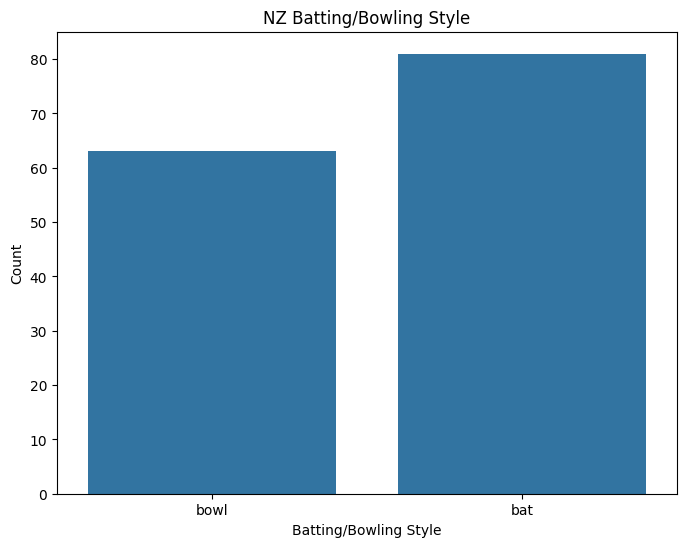

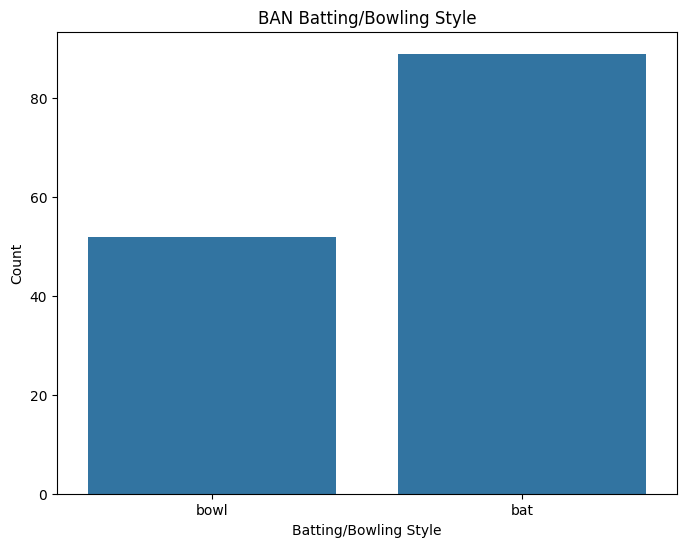

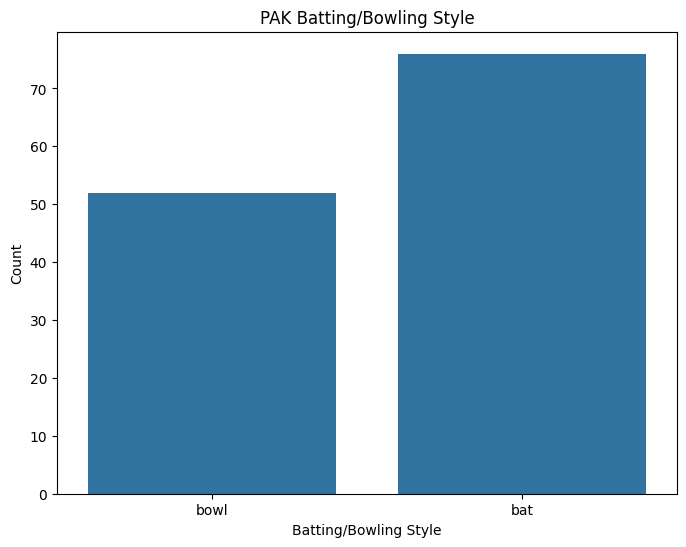

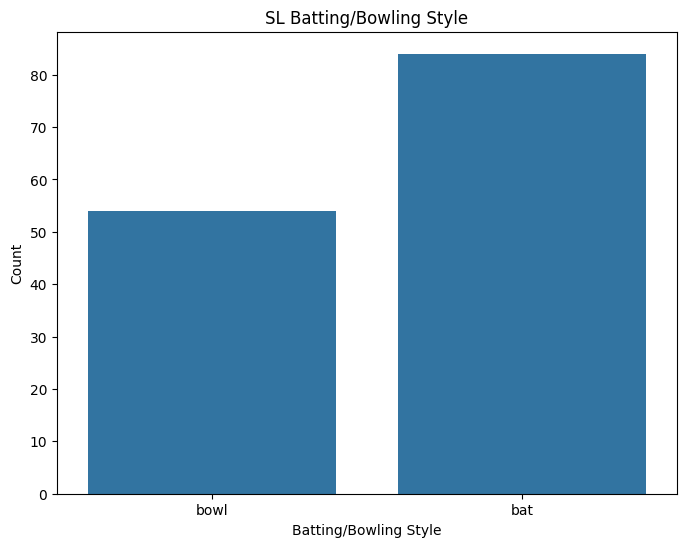

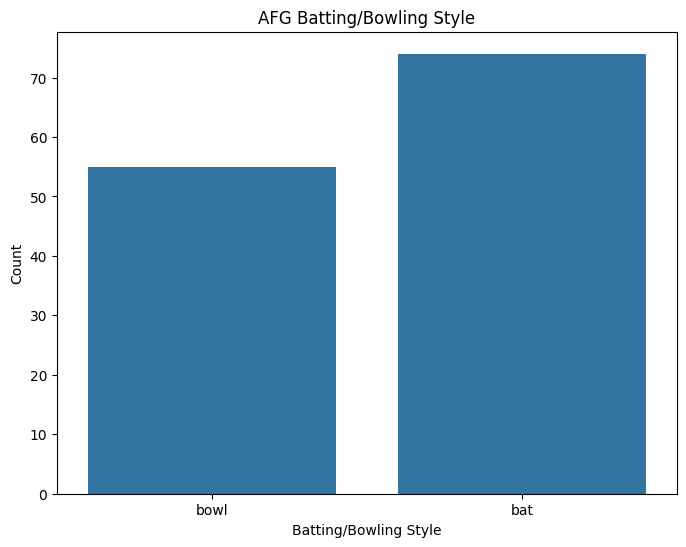

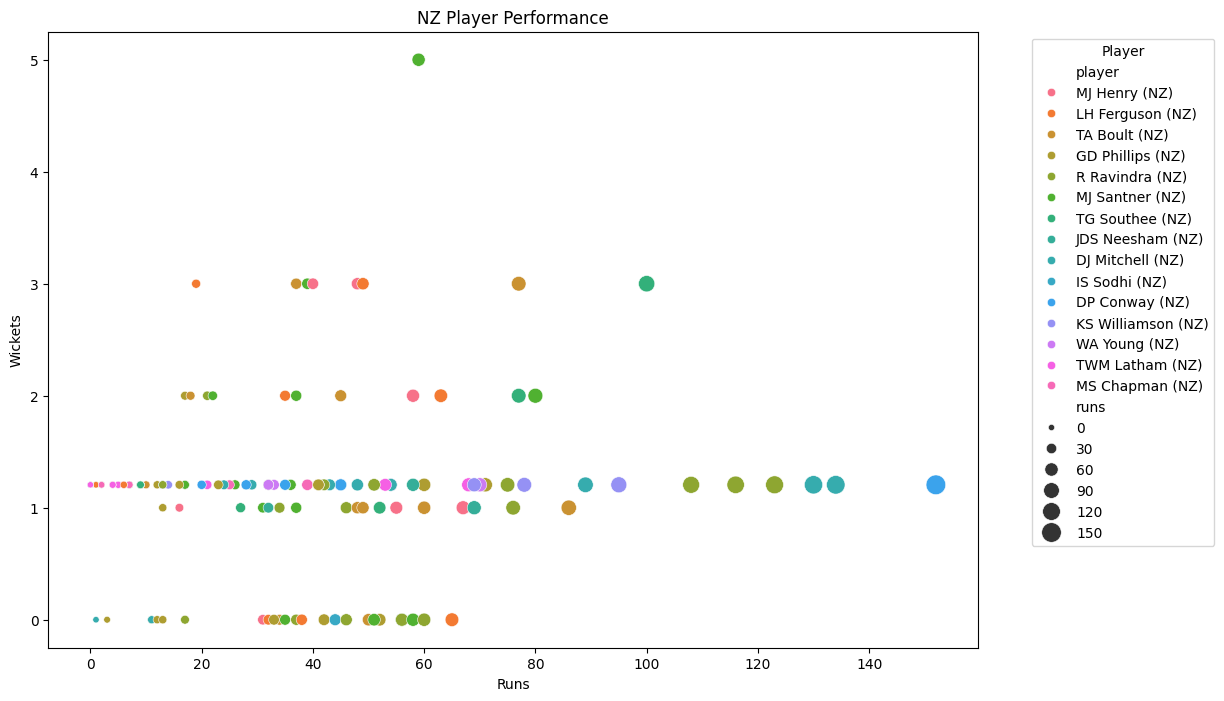

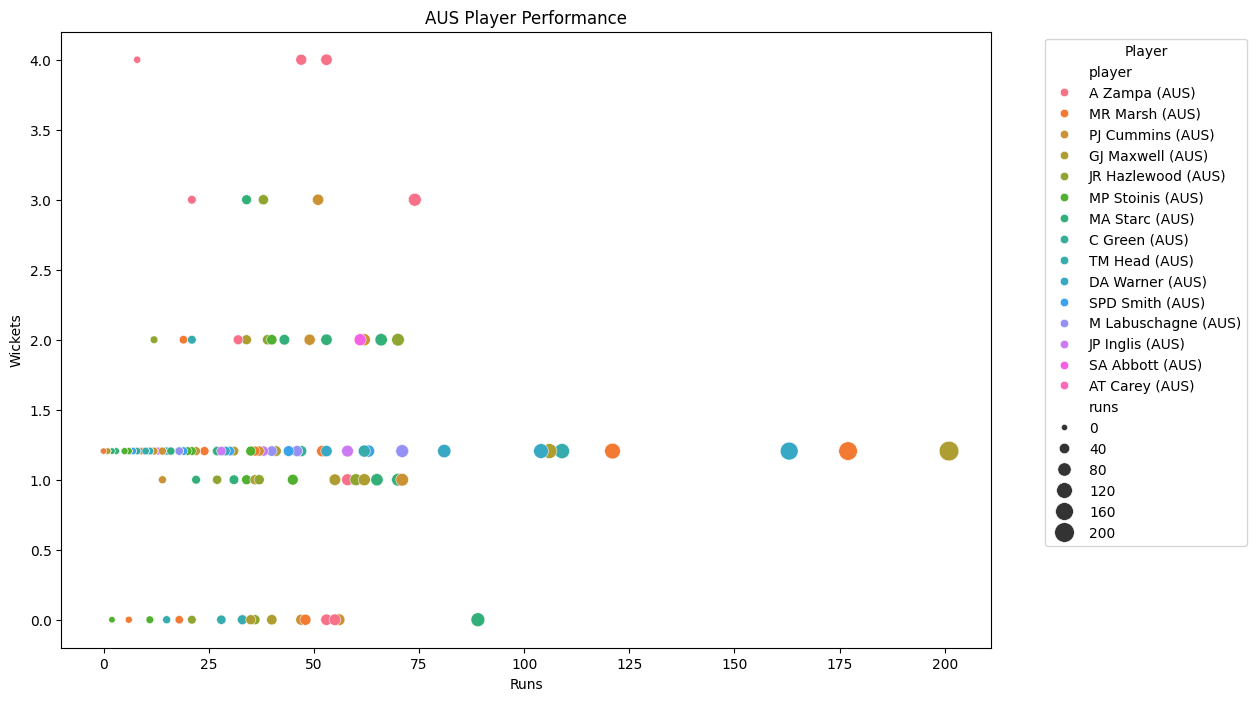

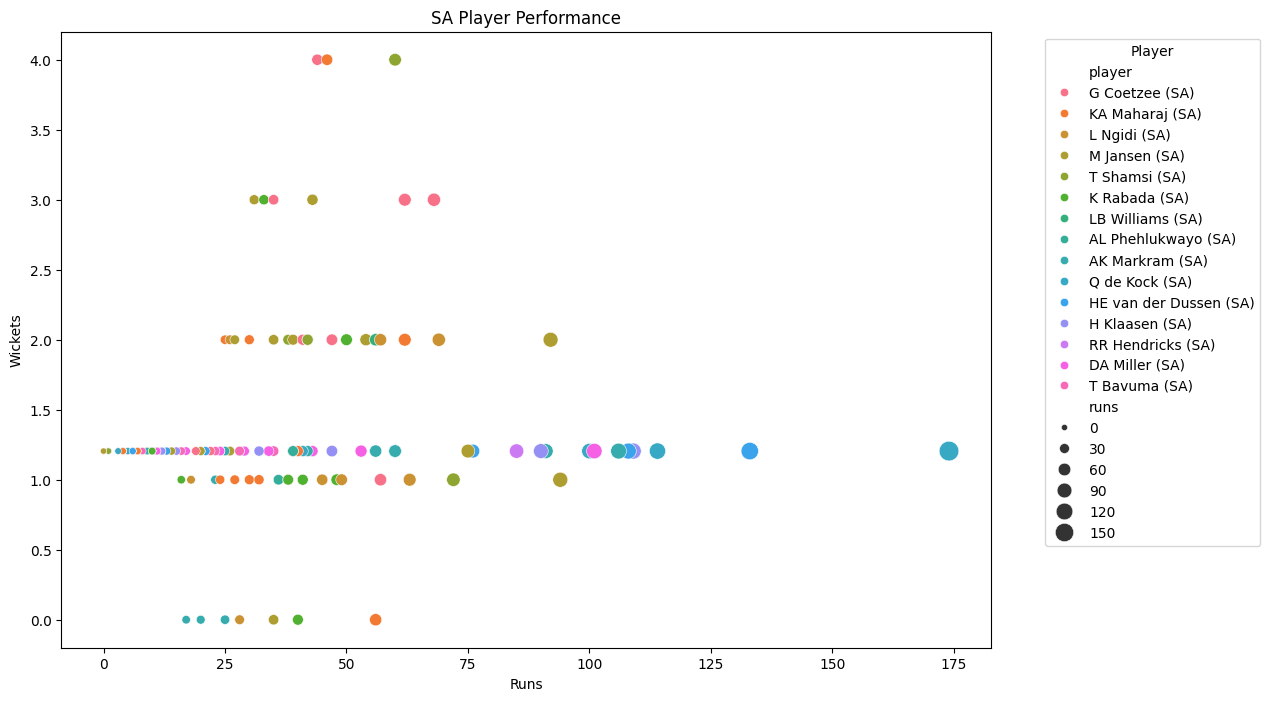

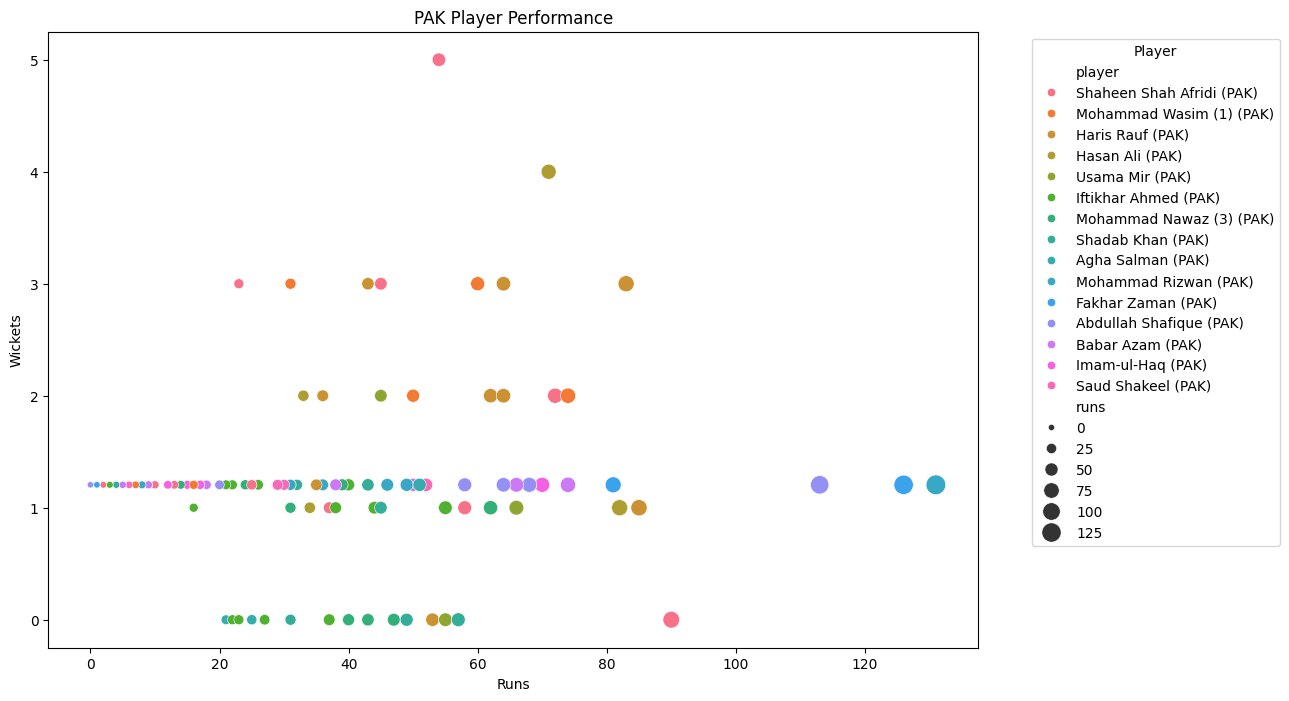

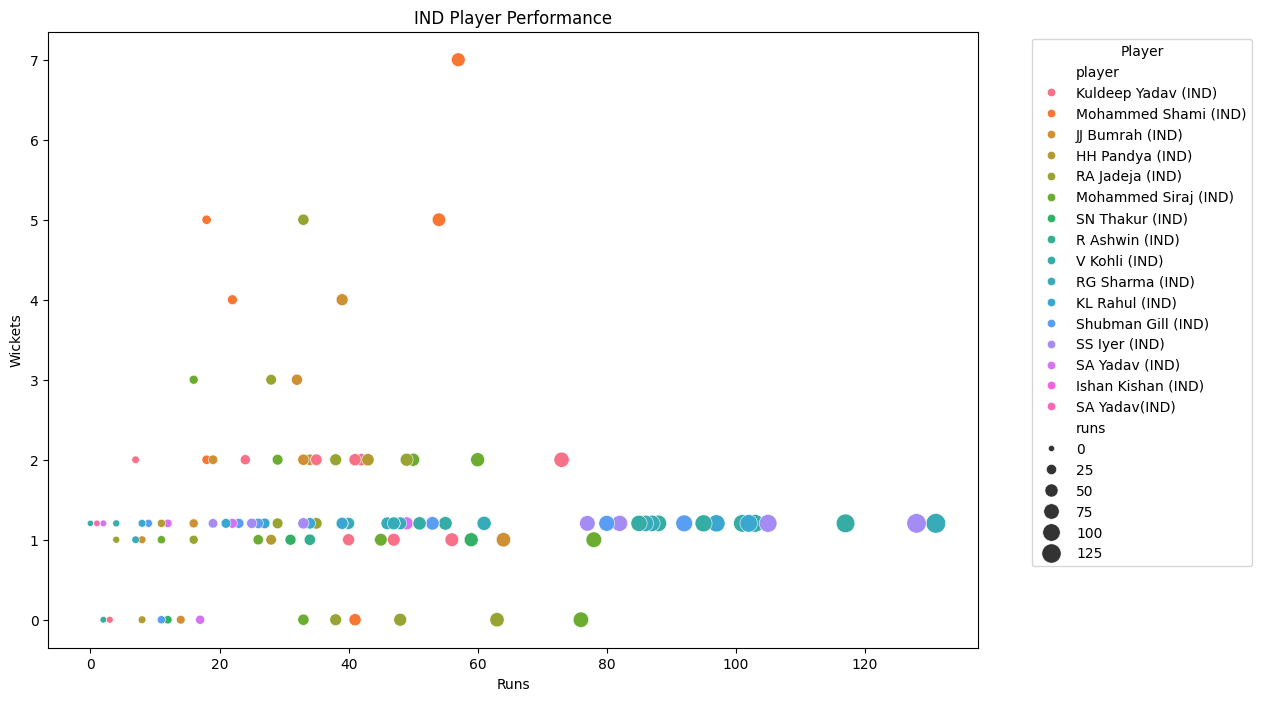

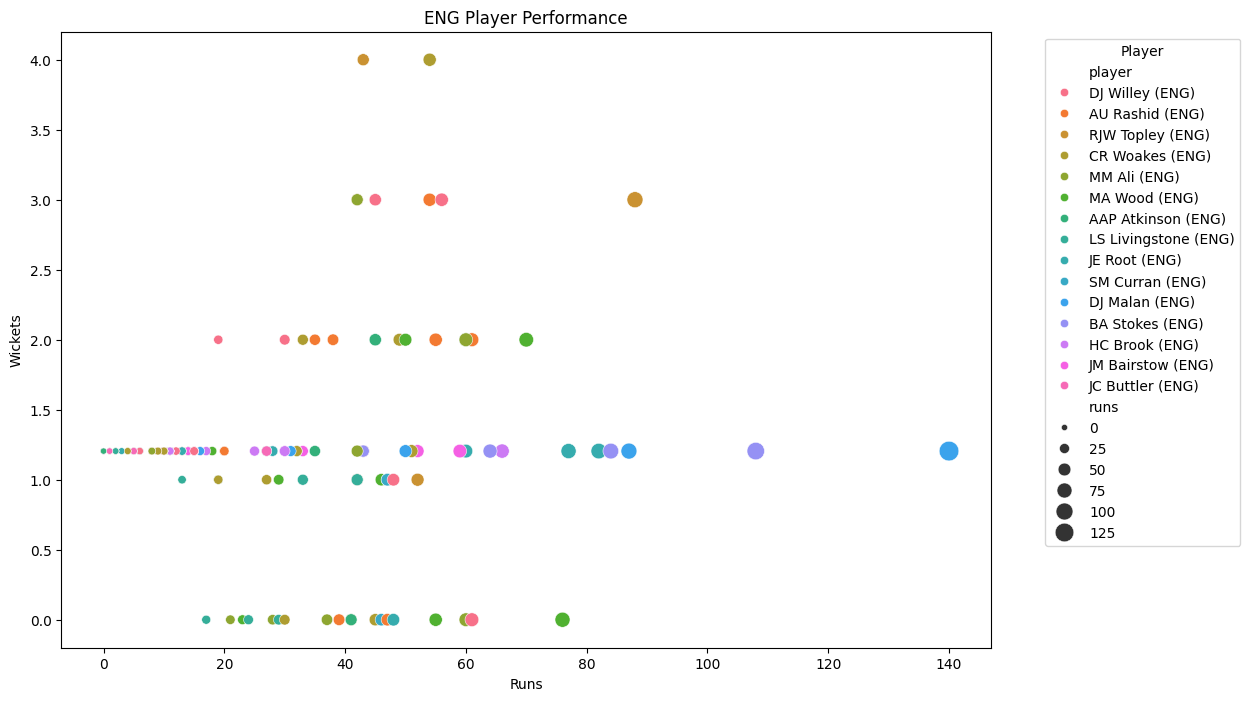

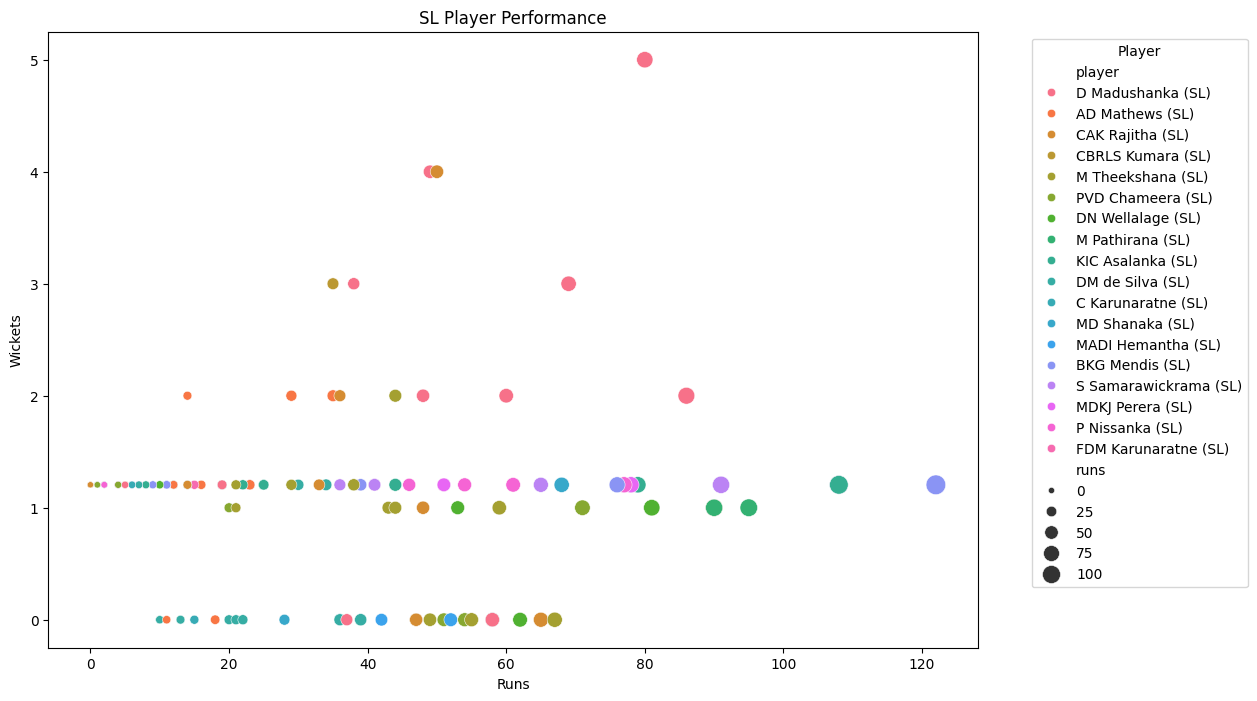

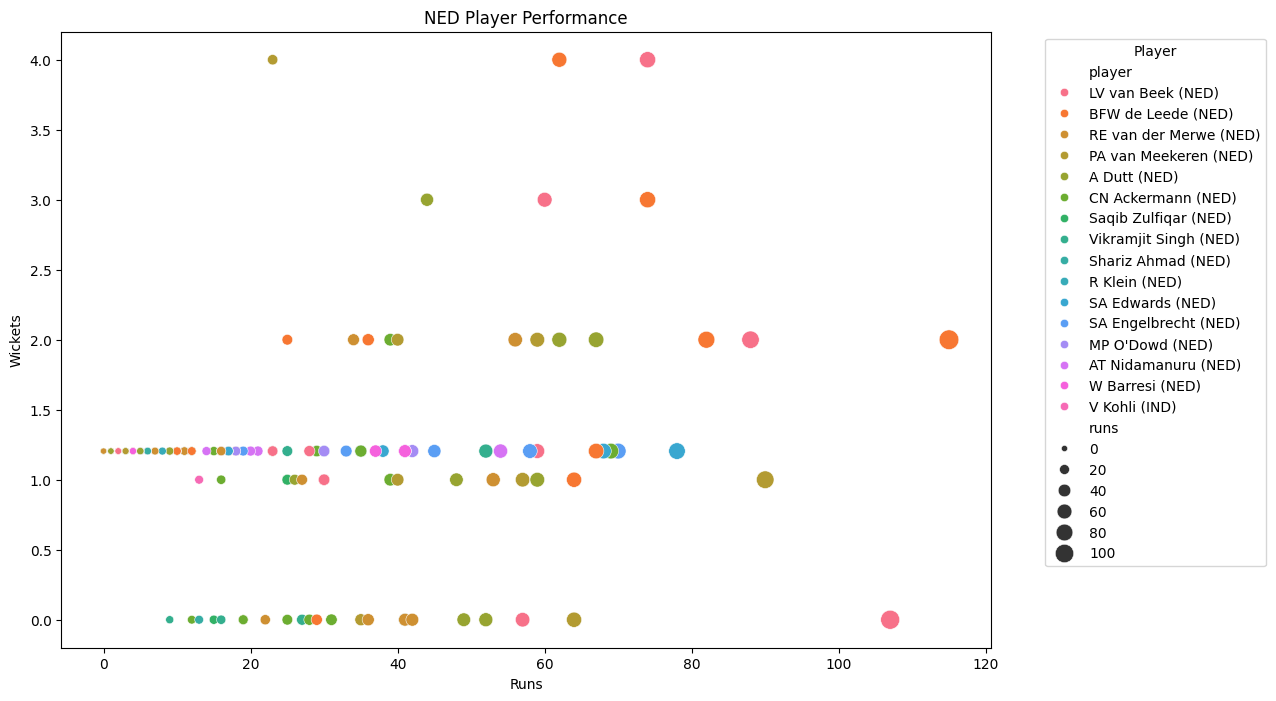

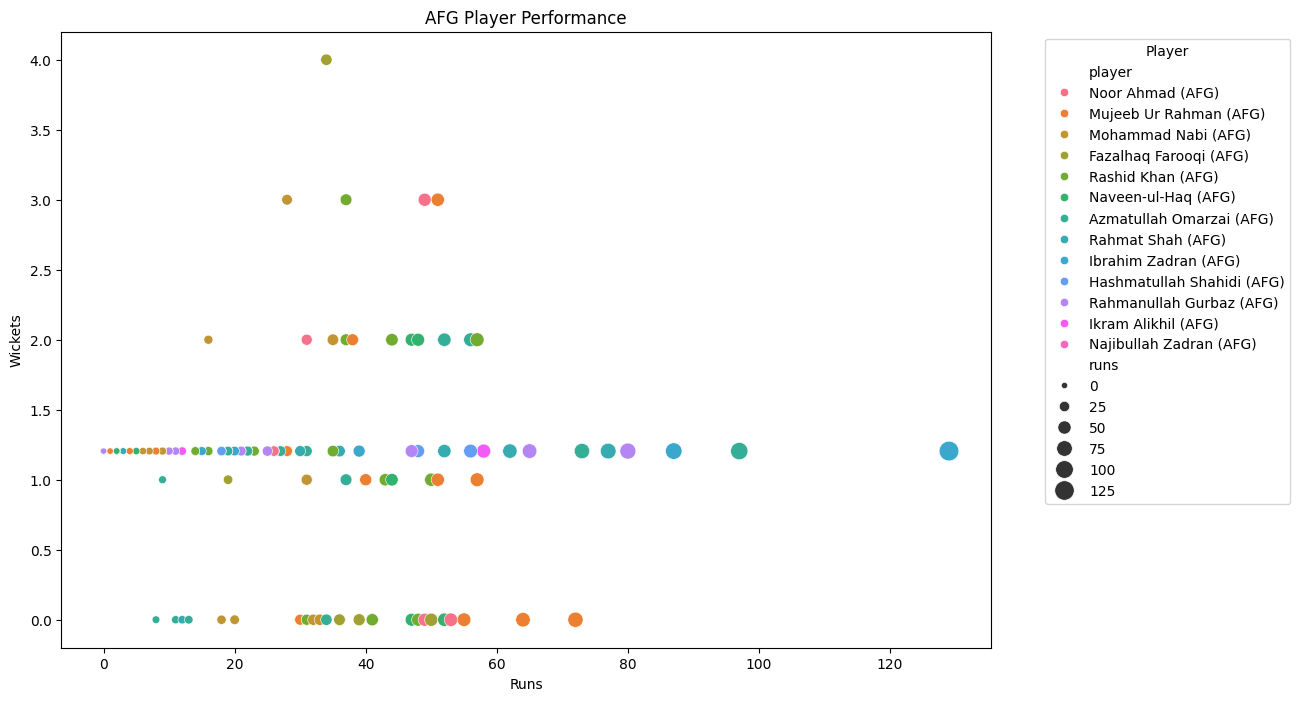

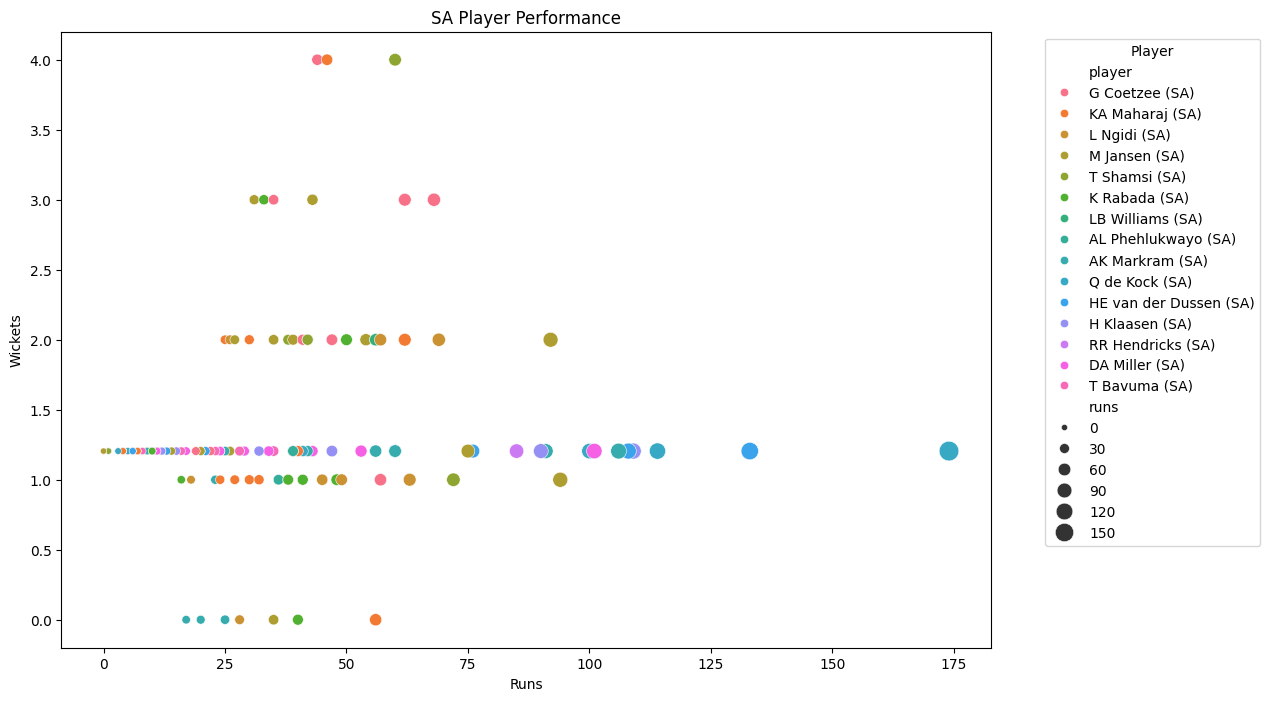

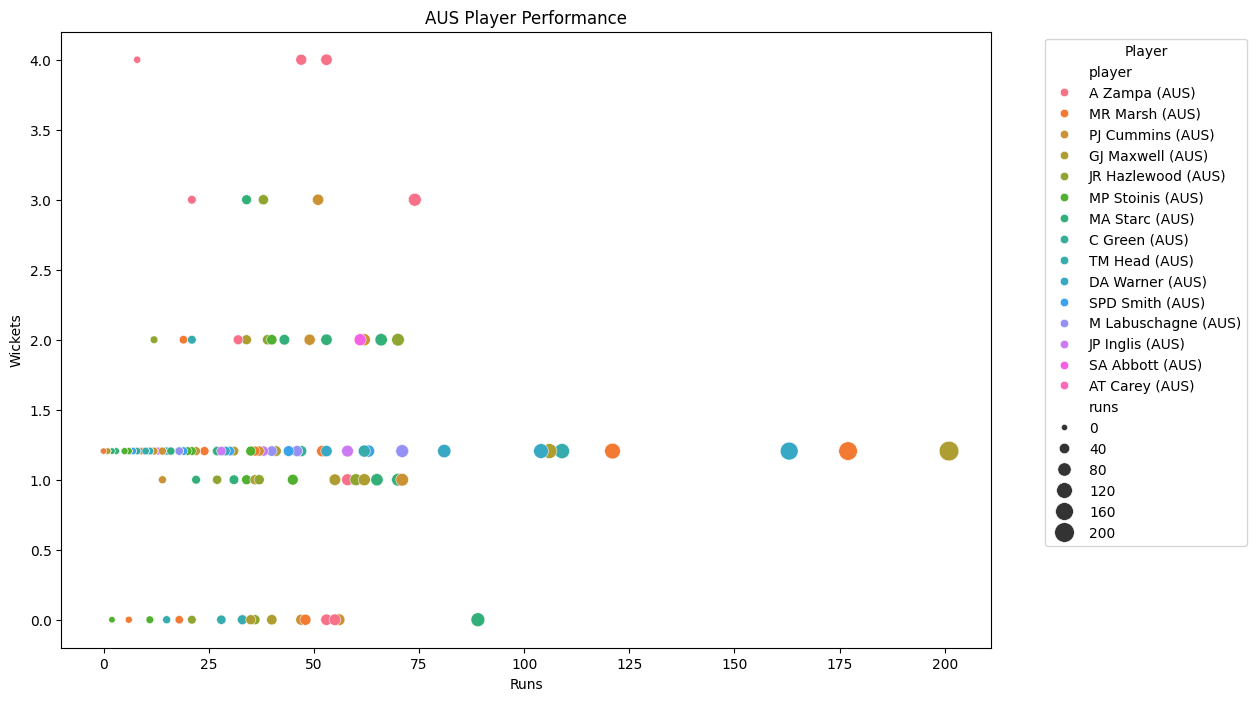

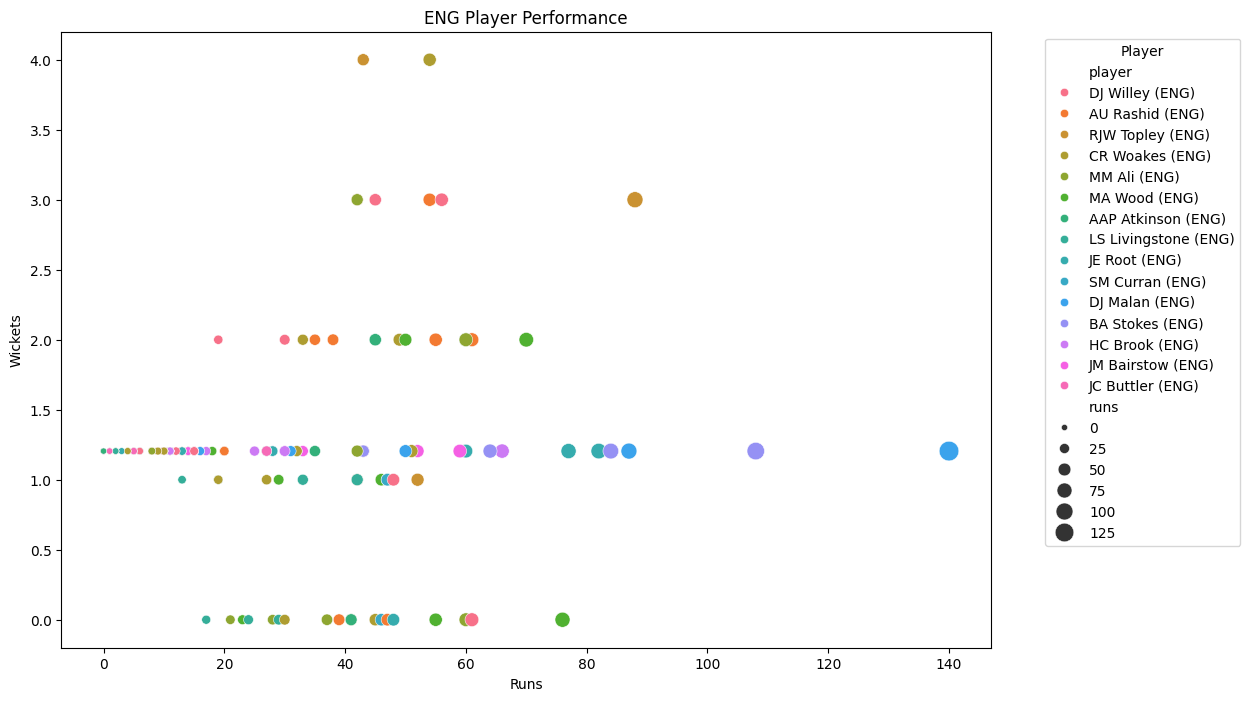

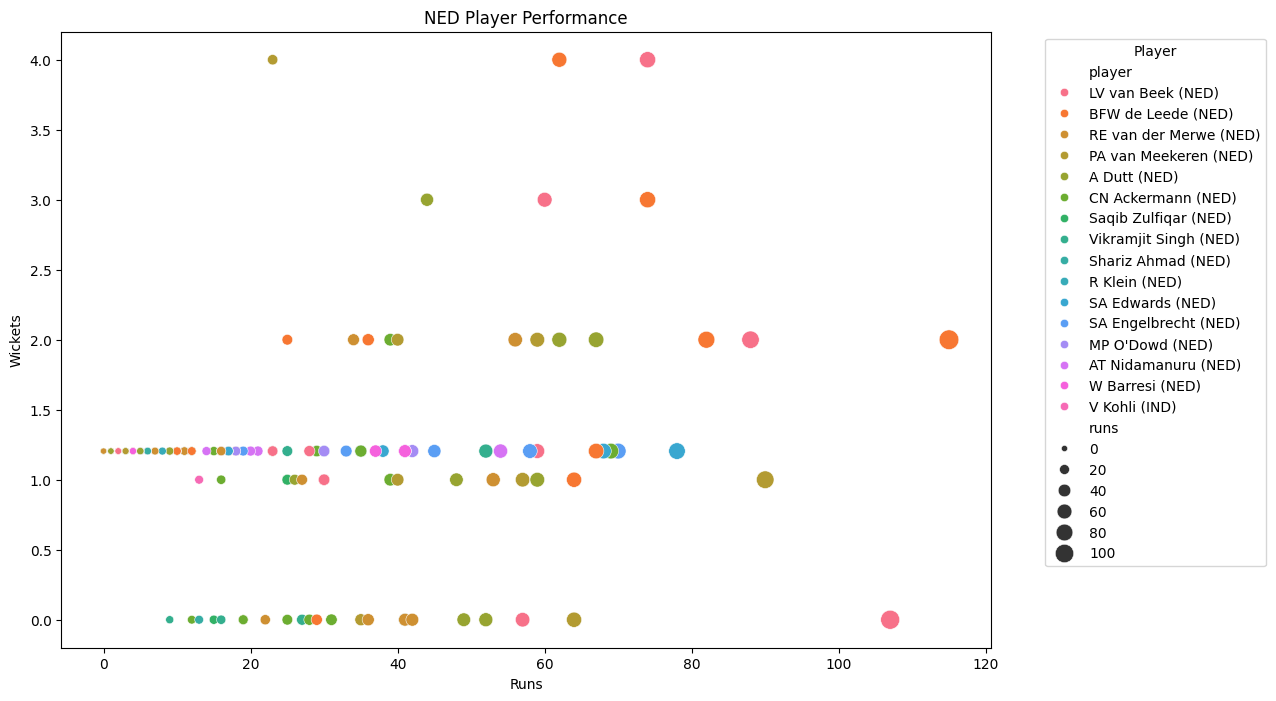

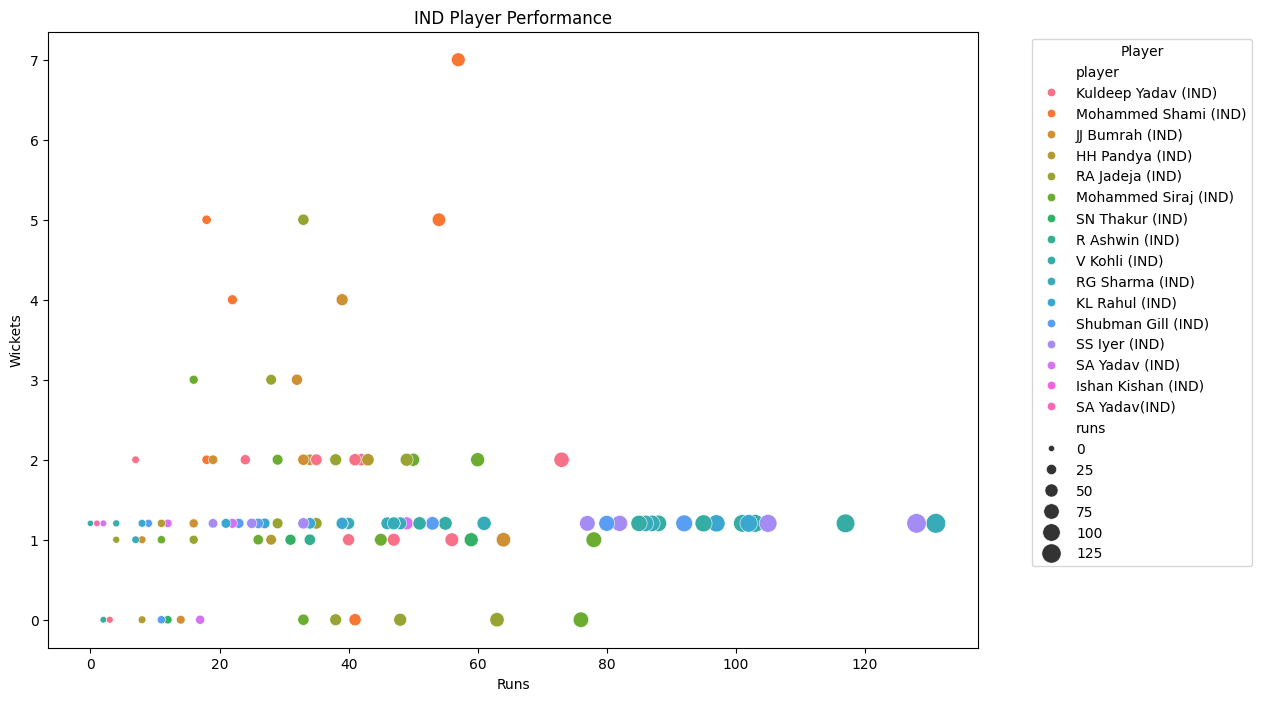

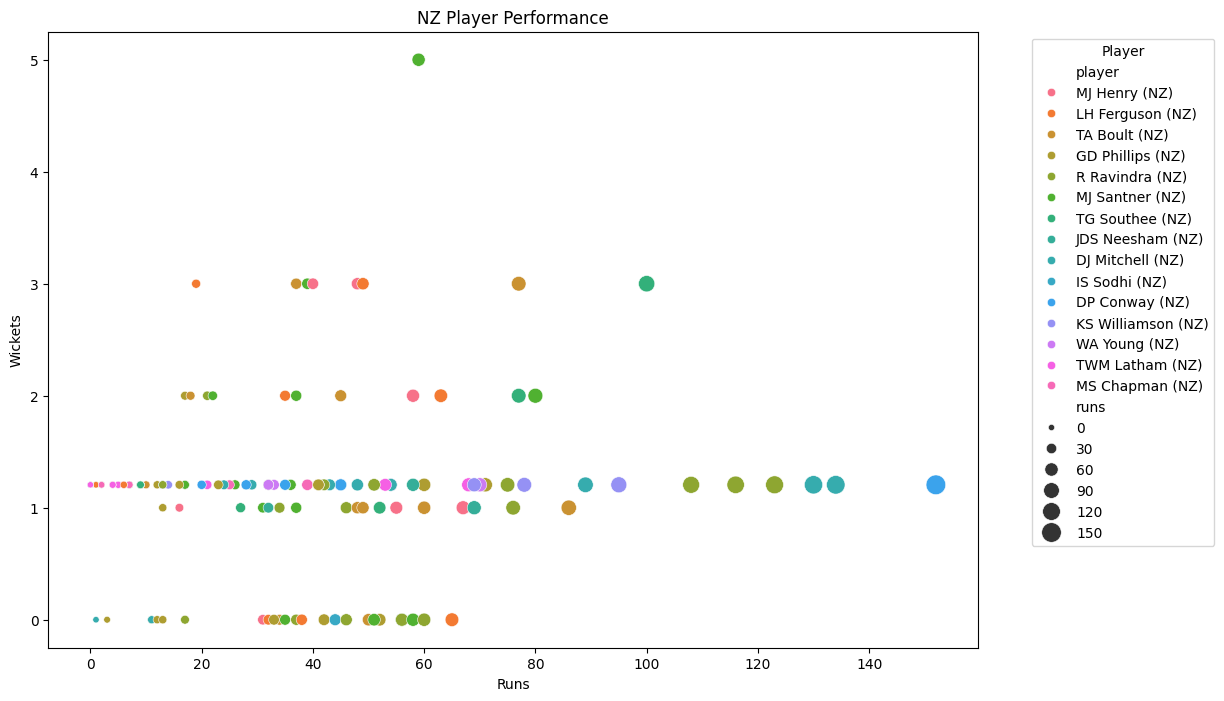

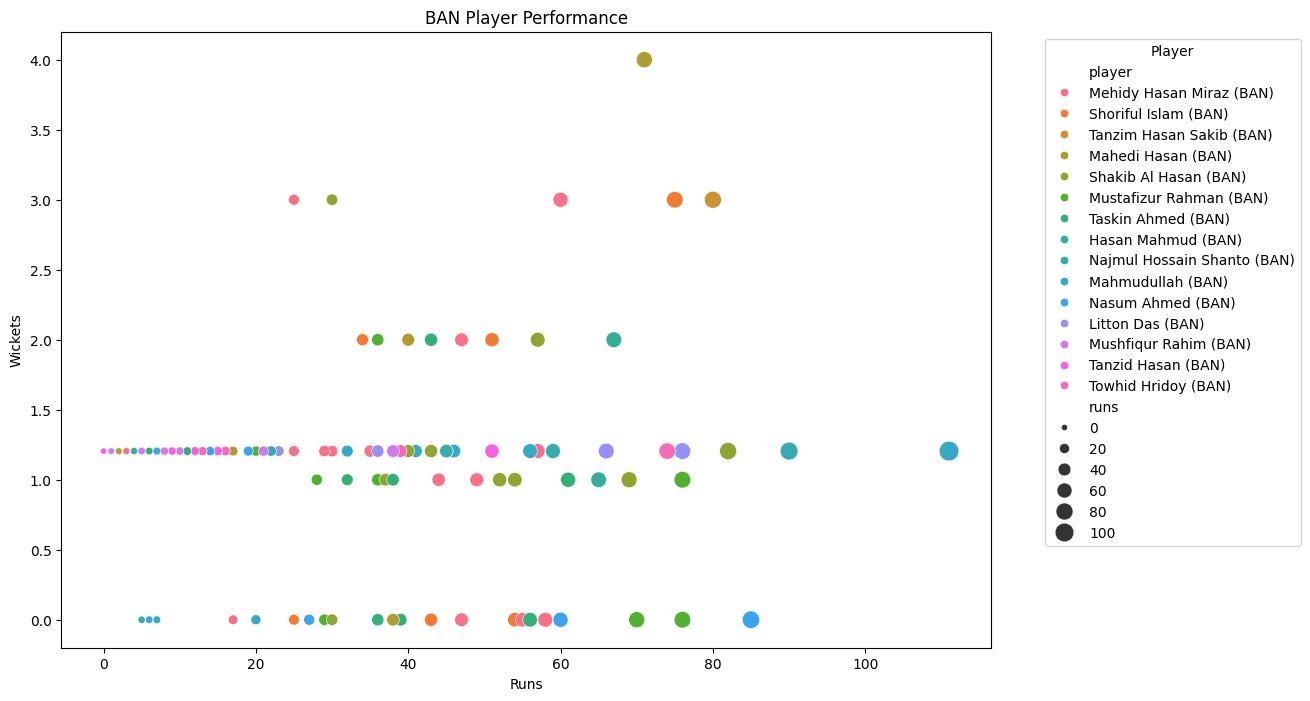

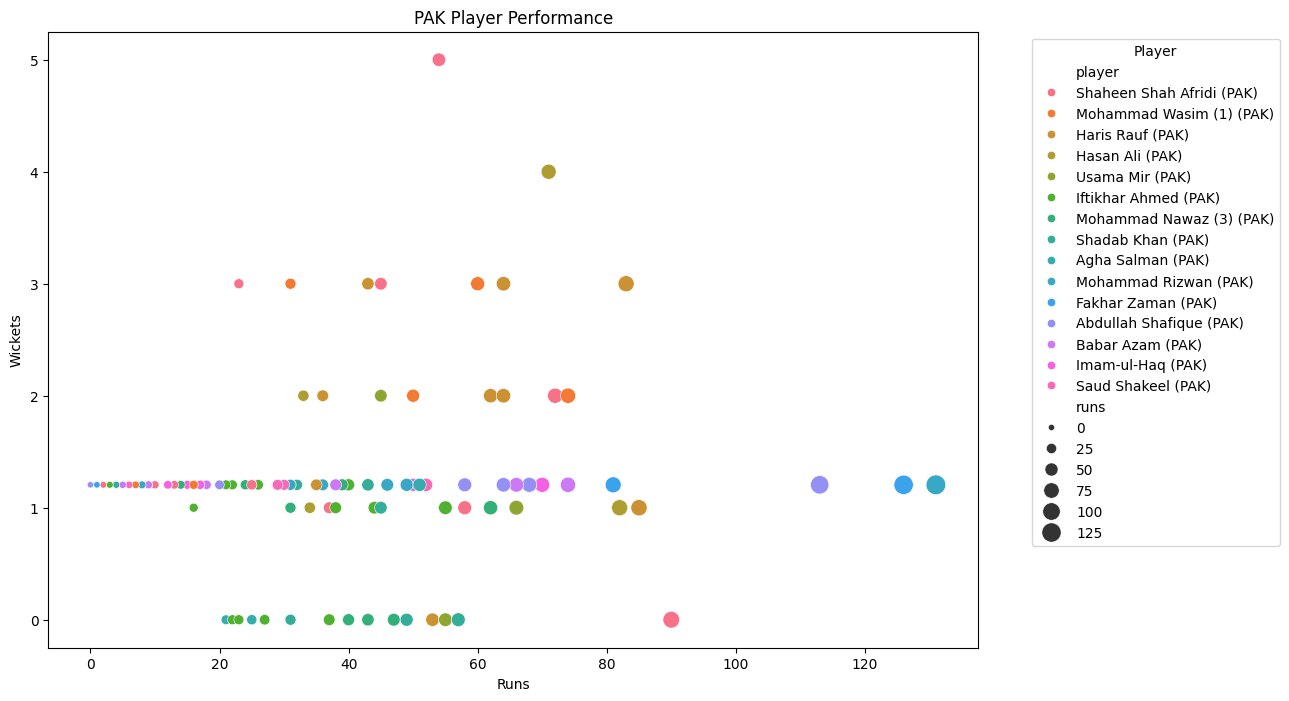

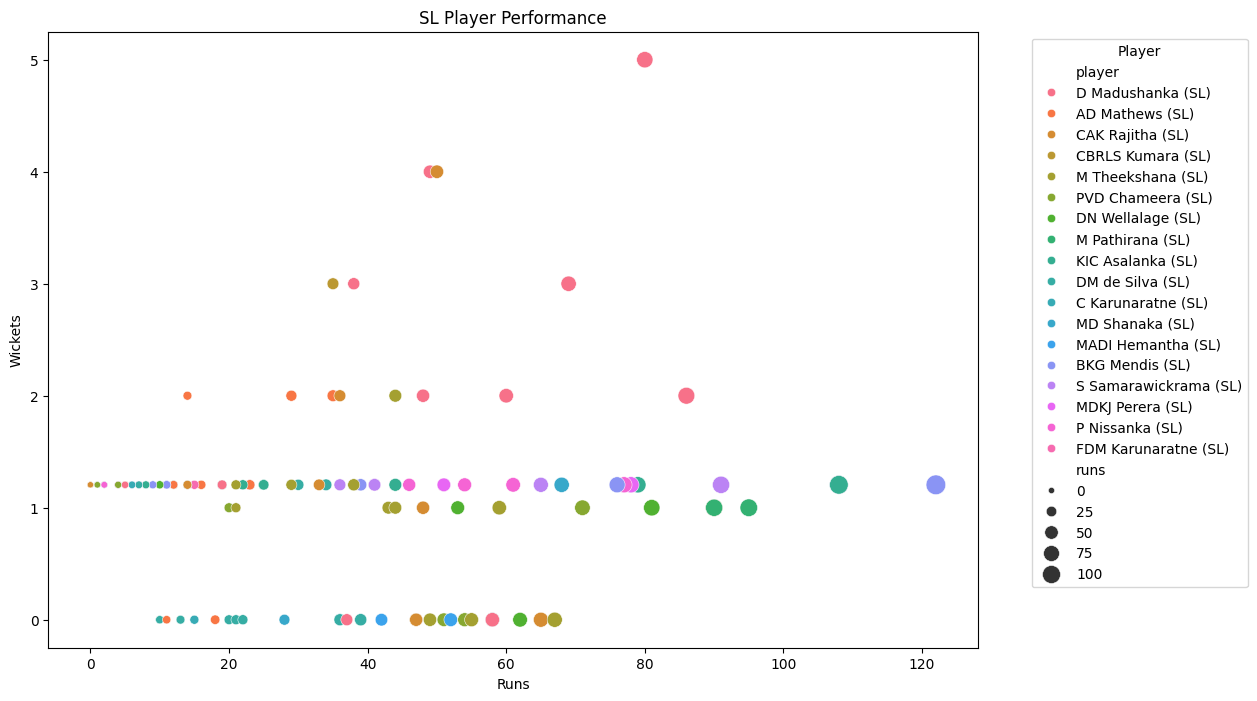

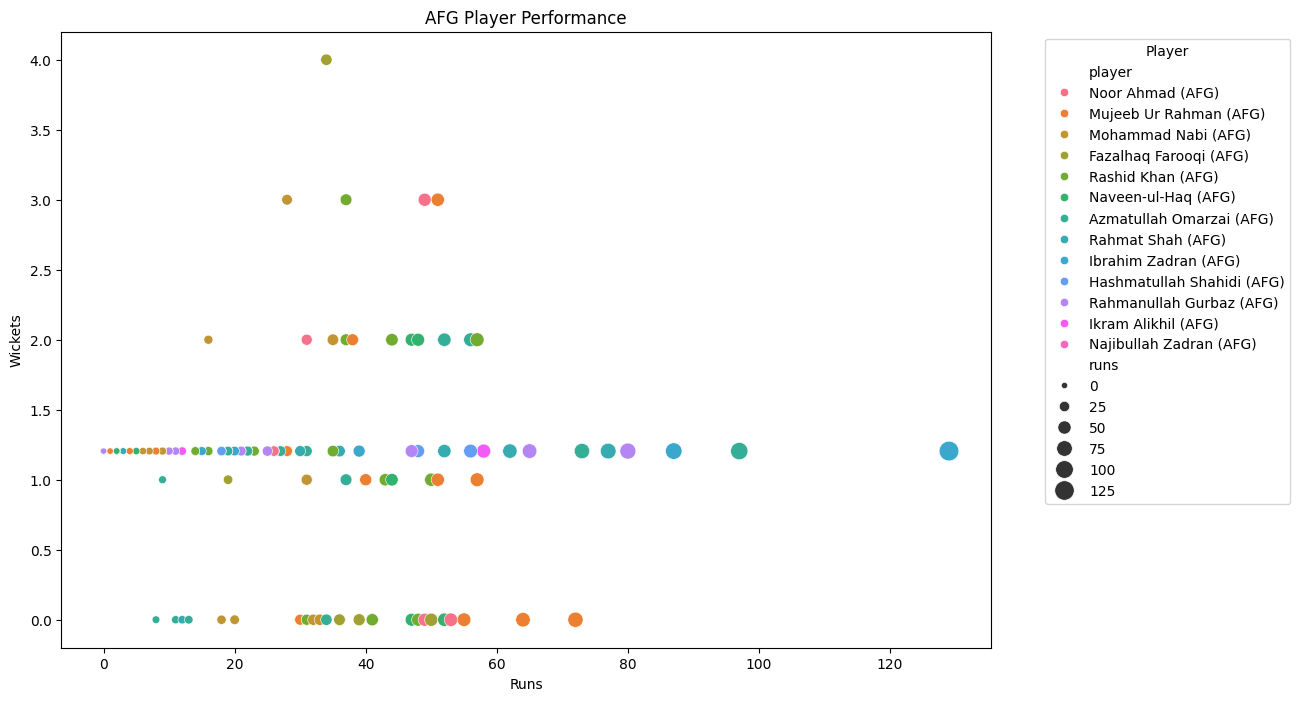

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the distribution of 'bat_or_bowl' values for top-performing teams
def analyze_batting_bowling_style(top_teams_df):
    for team in top_teams_df['team']:
        team_players = df[df['team'] == team]
        plt.figure(figsize=(8, 6))
        sns.countplot(x='bat_or_bowl', data=team_players)
        plt.title(f"{team} Batting/Bowling Style")
        plt.xlabel("Batting/Bowling Style")
        plt.ylabel("Count")
        plt.show()

analyze_batting_bowling_style(top_teams_by_runs)
analyze_batting_bowling_style(top_teams_by_wickets)

# Analyzing the individual player performance within each top-performing team
def analyze_player_performance(top_teams_df):
    for team in top_teams_df['team']:
        team_players = df[df['team'] == team]
        plt.figure(figsize=(12, 8))
        sns.scatterplot(x='runs', y='wkts', data=team_players, hue='player', size='runs', sizes=(20, 200))
        plt.title(f"{team} Player Performance")
        plt.xlabel("Runs")
        plt.ylabel("Wickets")
        plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

analyze_player_performance(top_teams_by_runs)
analyze_player_performance(top_teams_by_wickets)


Based on the provided player performance data for Bangladesh (BAN), Pakistan (PAK), Sri Lanka (SL), and Afghanistan (AFG), we can draw the following insights:

**Key Bowlers**: Shoriful Islam and Mahedi Hasan from Bangladesh, Shaheen Shah Afridi and Mohammad Wasim from Pakistan, D Madushanka and Mohammad Nabi from Sri Lanka, and Mujeeb Ur Rahman from Afghanistan have been key bowlers for their respective teams, consistently taking wickets with good economy rates.

**All-round Performances**: Some players like Mohammad Nabi from Afghanistan and AD Mathews from Sri Lanka have shown their value as all-rounders, contributing with both bat and ball.

**Consistent Performances**: Players like Shoriful Islam and Tanzim Hasan Sakib from Bangladesh, Haris Rauf from Pakistan, and D Madushanka from Sri Lanka have shown consistency in their performances, taking wickets and maintaining good economy rates.

**Match Impact**: Players like Shoriful Islam from Bangladesh and Shaheen Shah Afridi from Pakistan have had match-winning performances, taking crucial wickets at important times.

**Improving Performances**: Some players, such as Noor Ahmad from Afghanistan, have shown improvement over time, taking more wickets and being more economical.







In [ ]:
print(df.columns)



Index(['team', 'player', 'bat_or_bowl', 'bb_bf', 'runs', 'wkts',
       'wicketball_prob', 'runs_per_ball', 'opposition', 'ground',
       'start_date', 'overs', 'mdns', 'econ', 'inns', '4s', '6s', 'sr',
       'not_out', 'mins'],
      dtype='object')


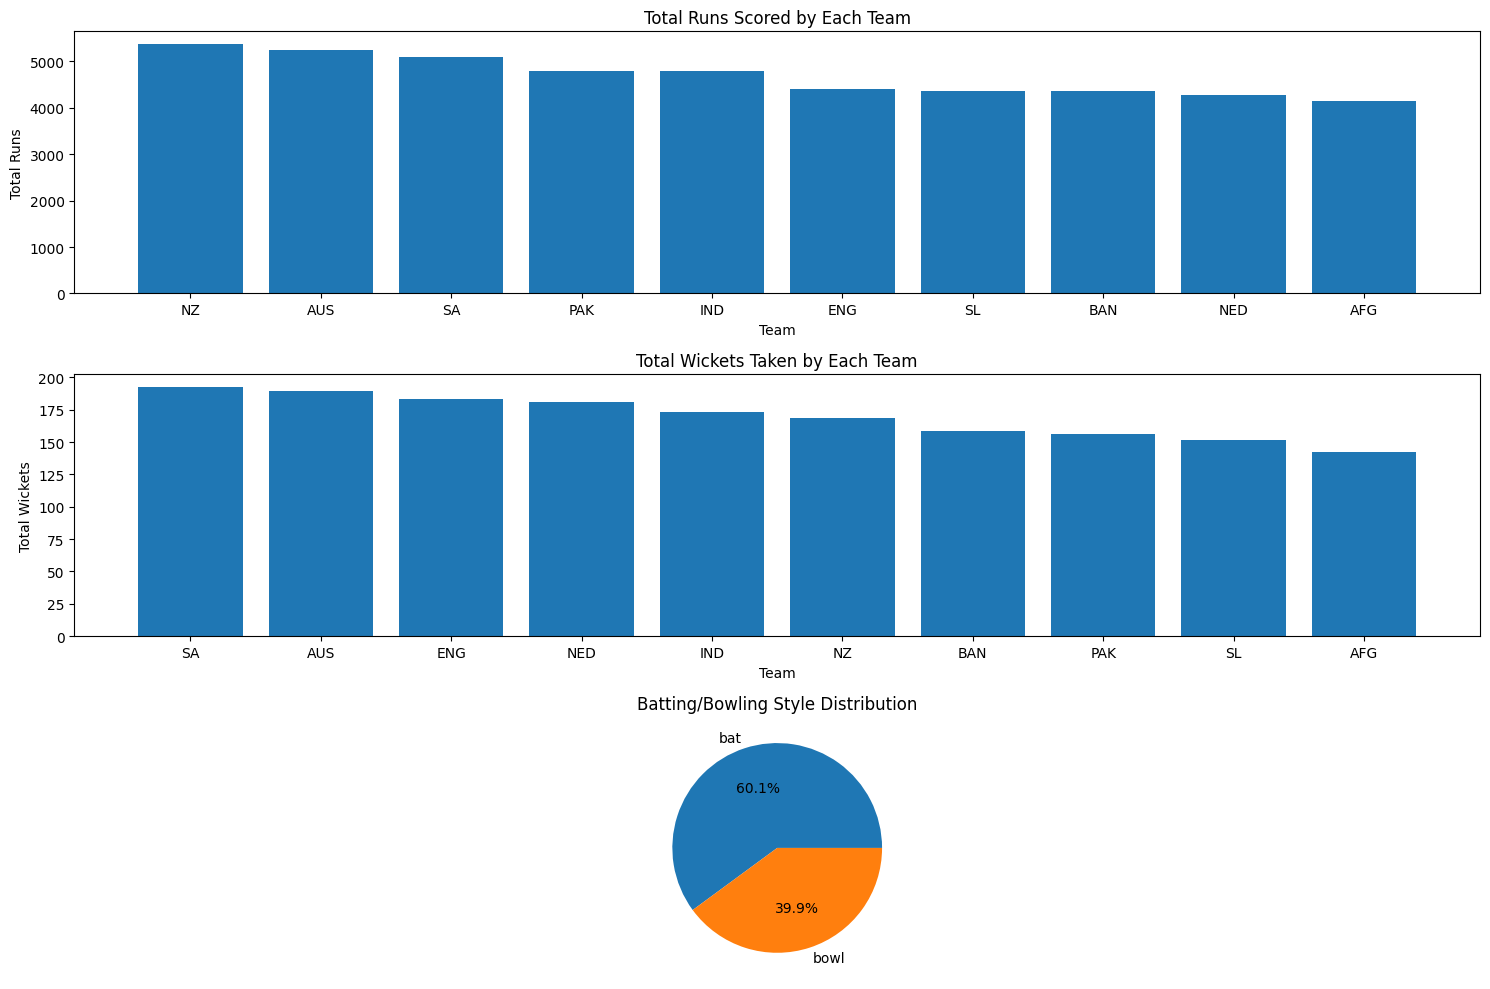

In [ ]:
# Creating plots
fig, axs = plt.subplots(3, 1, figsize=(15, 10))

# Plot 1: Total Runs Scored by Each Team
axs[0].bar(top_teams_by_runs['team'], top_teams_by_runs['runs'])
axs[0].set_title('Total Runs Scored by Each Team')
axs[0].set_xlabel('Team')
axs[0].set_ylabel('Total Runs')

# Plot 2: Total Wickets Taken by Each Team
axs[1].bar(top_teams_by_wickets['team'], top_teams_by_wickets['wkts'])
axs[1].set_title('Total Wickets Taken by Each Team')
axs[1].set_xlabel('Team')
axs[1].set_ylabel('Total Wickets')

# Plot 3: Batting/Bowling Style Distribution
bat_bowl_counts = df['bat_or_bowl'].value_counts()
axs[2].pie(bat_bowl_counts, labels=bat_bowl_counts.index, autopct='%1.1f%%')
axs[2].set_title('Batting/Bowling Style Distribution')

plt.tight_layout()
plt.show()






**Player Performance Analysis**

In [ ]:
import pandas as pd



# Calculating the batting statistics
batting_stats = df.groupby('player').agg({'runs': 'sum', 'bb_bf': 'sum', '4s': 'sum', '6s': 'sum'}).reset_index()
batting_stats['batting_average'] = batting_stats['runs'] / batting_stats['bb_bf']
batting_stats['strike_rate'] = (batting_stats['runs'] / batting_stats['bb_bf']) * 100

# Calculating the bowling statistics
bowling_stats = df.groupby('player').agg({'wkts': 'sum', 'overs': 'sum', 'runs': 'sum'}).reset_index()
bowling_stats['bowling_average'] = bowling_stats['runs'] / bowling_stats['wkts']
bowling_stats['economy_rate'] = bowling_stats['runs'] / bowling_stats['overs']

# Identifying leading run-scorers and wicket-takers
leading_run_scorers = batting_stats.sort_values(by='runs', ascending=False).head(10)
leading_wicket_takers = bowling_stats.sort_values(by='wkts', ascending=False).head(10)

# Printing the results
print("Leading Run Scorers:")
print(leading_run_scorers[['player', 'runs', 'batting_average', 'strike_rate']])

print("\nLeading Wicket Takers:")
print(leading_wicket_takers[['player', 'wkts', 'bowling_average', 'economy_rate']])


Leading Run Scorers:
                       player  runs  batting_average  strike_rate
110           R Ravindra (NZ)   971         1.036286   103.628602
148             V Kohli (IND)   726         0.901863    90.186335
36           GJ Maxwell (AUS)   693         1.082812   108.281250
13         BFW de Leede (NED)   626         1.041597   104.159734
11   Azmatullah Omarzai (AFG)   623         1.057725   105.772496
68          LV van Beek (NED)   616         1.019868   101.986755
105          PJ Cummins (AUS)   609         0.918552    91.855204
70              M Jansen (SA)   607         1.091727   109.172662
88   Mehidy Hasan Miraz (BAN)   603         0.880292    88.029197
107            Q de Kock (SA)   594         1.070270   107.027027

Leading Wicket Takers:
                        player       wkts  bowling_average  economy_rate
1                A Zampa (AUS)  29.227758        17.757092      3.990614
13          BFW de Leede (NED)  26.841637        23.321975      4.703841
70        

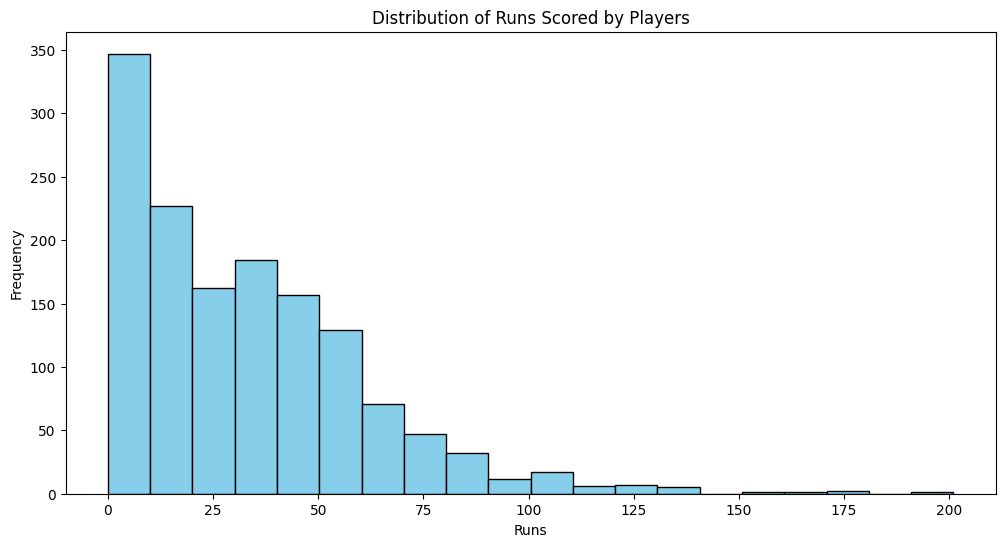

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(df['runs'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title('Distribution of Runs Scored by Players')
plt.show()


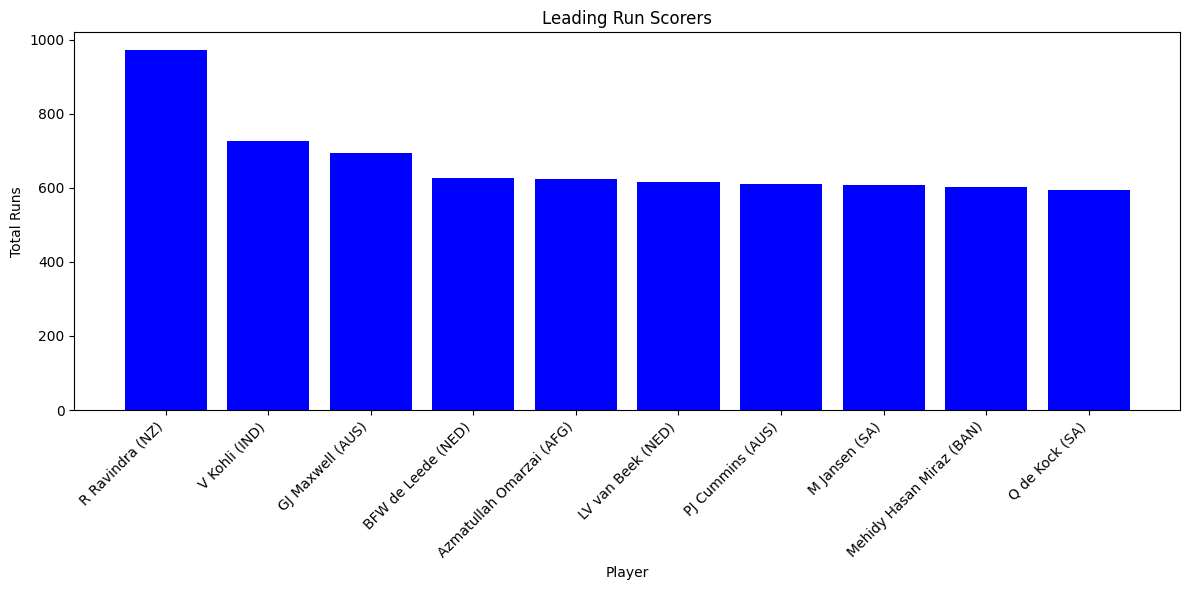

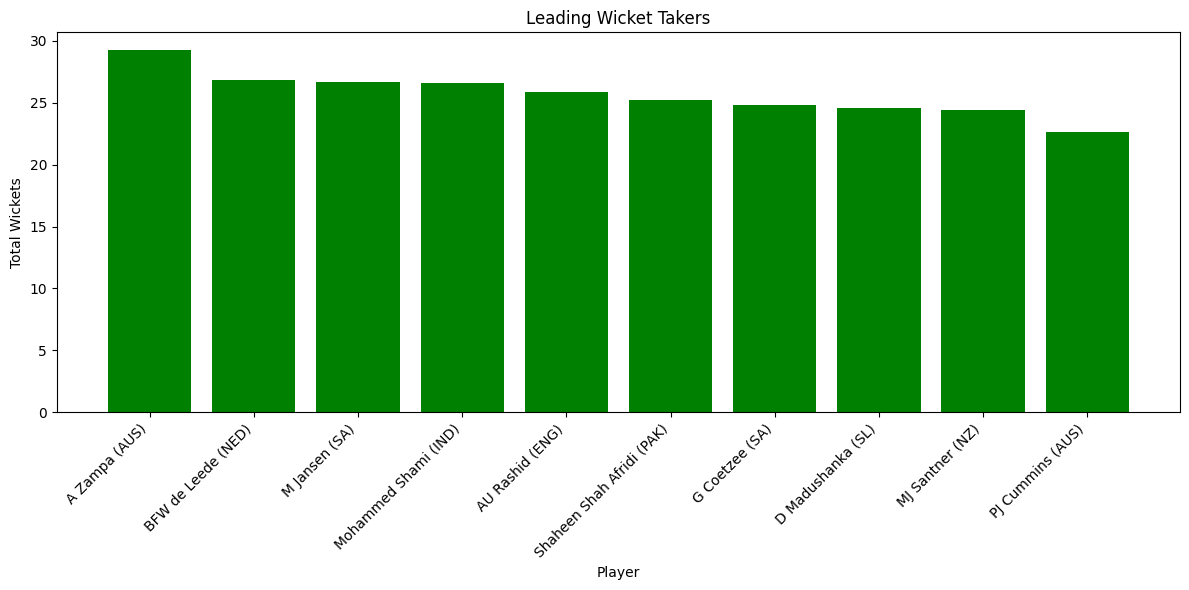

In [ ]:
import matplotlib.pyplot as plt

# Plotting the leading run scorers
plt.figure(figsize=(12, 6))
plt.bar(leading_run_scorers['player'], leading_run_scorers['runs'], color='b')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.title('Leading Run Scorers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the leading wicket takers
plt.figure(figsize=(12, 6))
plt.bar(leading_wicket_takers['player'], leading_wicket_takers['wkts'], color='g')
plt.xlabel('Player')
plt.ylabel('Total Wickets')
plt.title('Leading Wicket Takers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Opposition and Ground Analysis**

*Performance against different oppositions*

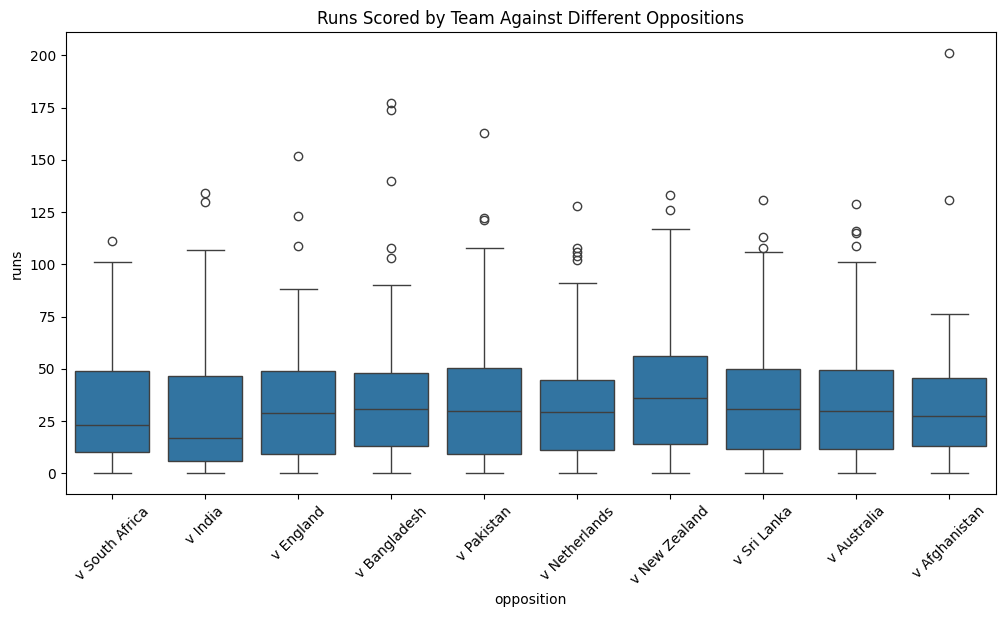

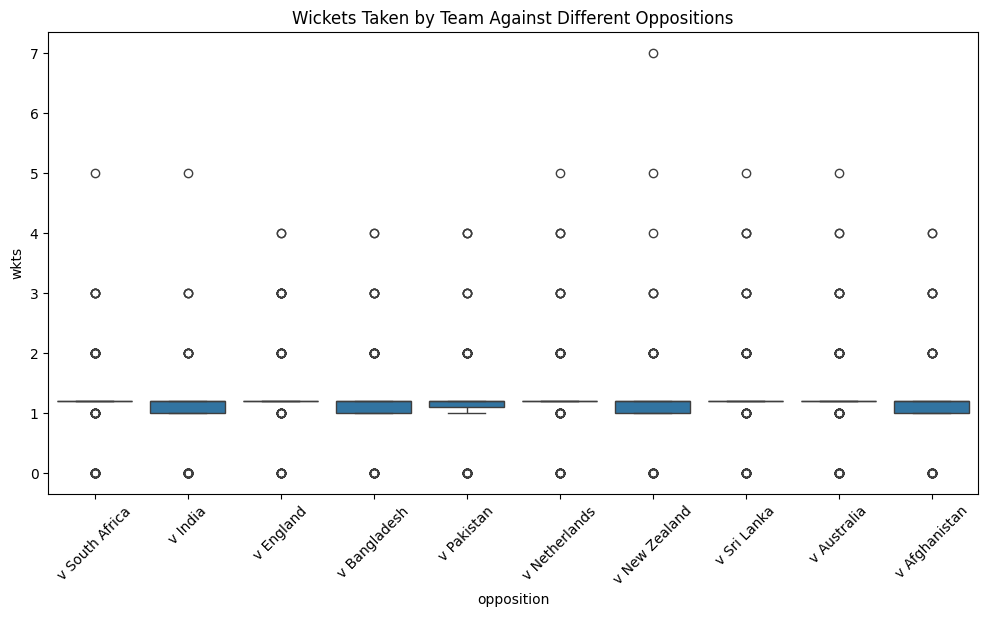

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='opposition', y='runs', data=df)
plt.title('Runs Scored by Team Against Different Oppositions')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='opposition', y='wkts', data=df)
plt.title('Wickets Taken by Team Against Different Oppositions')
plt.xticks(rotation=45)
plt.show()

*Performance variations across different playing grounds*

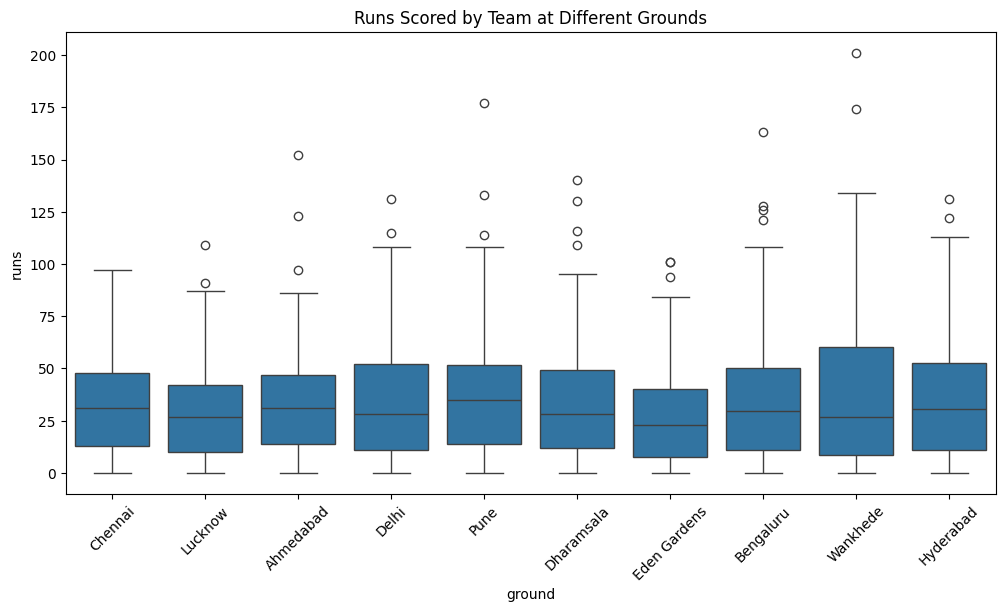

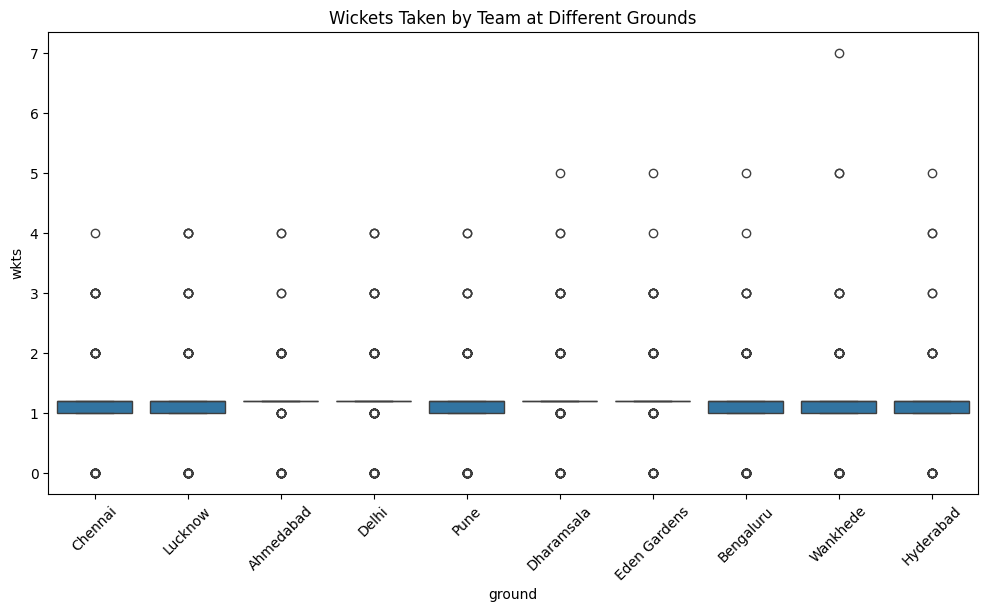

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ground', y='runs', data=df)
plt.title('Runs Scored by Team at Different Grounds')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='ground', y='wkts', data=df)
plt.title('Wickets Taken by Team at Different Grounds')
plt.xticks(rotation=45)
plt.show()


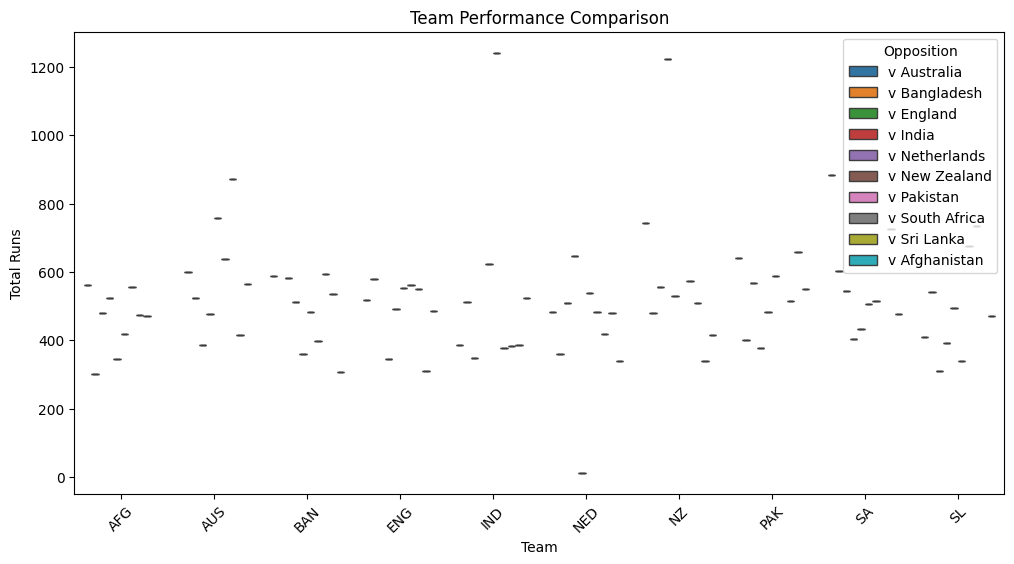

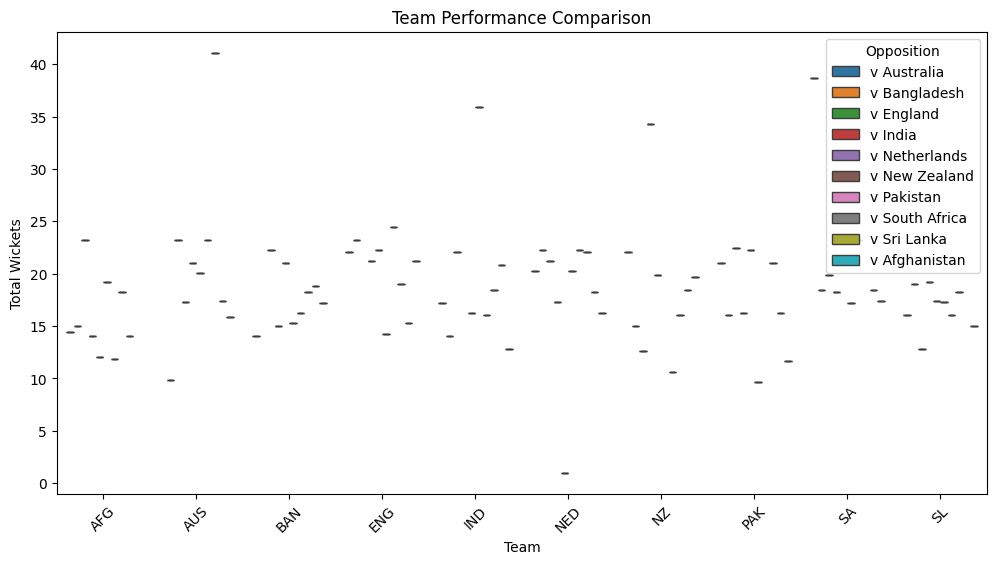

In [ ]:



# Team performance comparison
team_performance = df.groupby(['team', 'opposition']).agg({'runs': 'sum', 'wkts': 'sum'}).reset_index()

# Player performance comparison
player_performance = df.groupby(['player', 'opposition']).agg({'runs': 'sum', 'wkts': 'sum'}).reset_index()

# Plotting team performance
plt.figure(figsize=(12, 6))
sns.boxplot(x='team', y='runs', hue='opposition', data=team_performance)
plt.title('Team Performance Comparison')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.legend(title='Opposition')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='team', y='wkts', hue='opposition', data=team_performance)
plt.title('Team Performance Comparison')
plt.xlabel('Team')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.legend(title='Opposition')
plt.show()




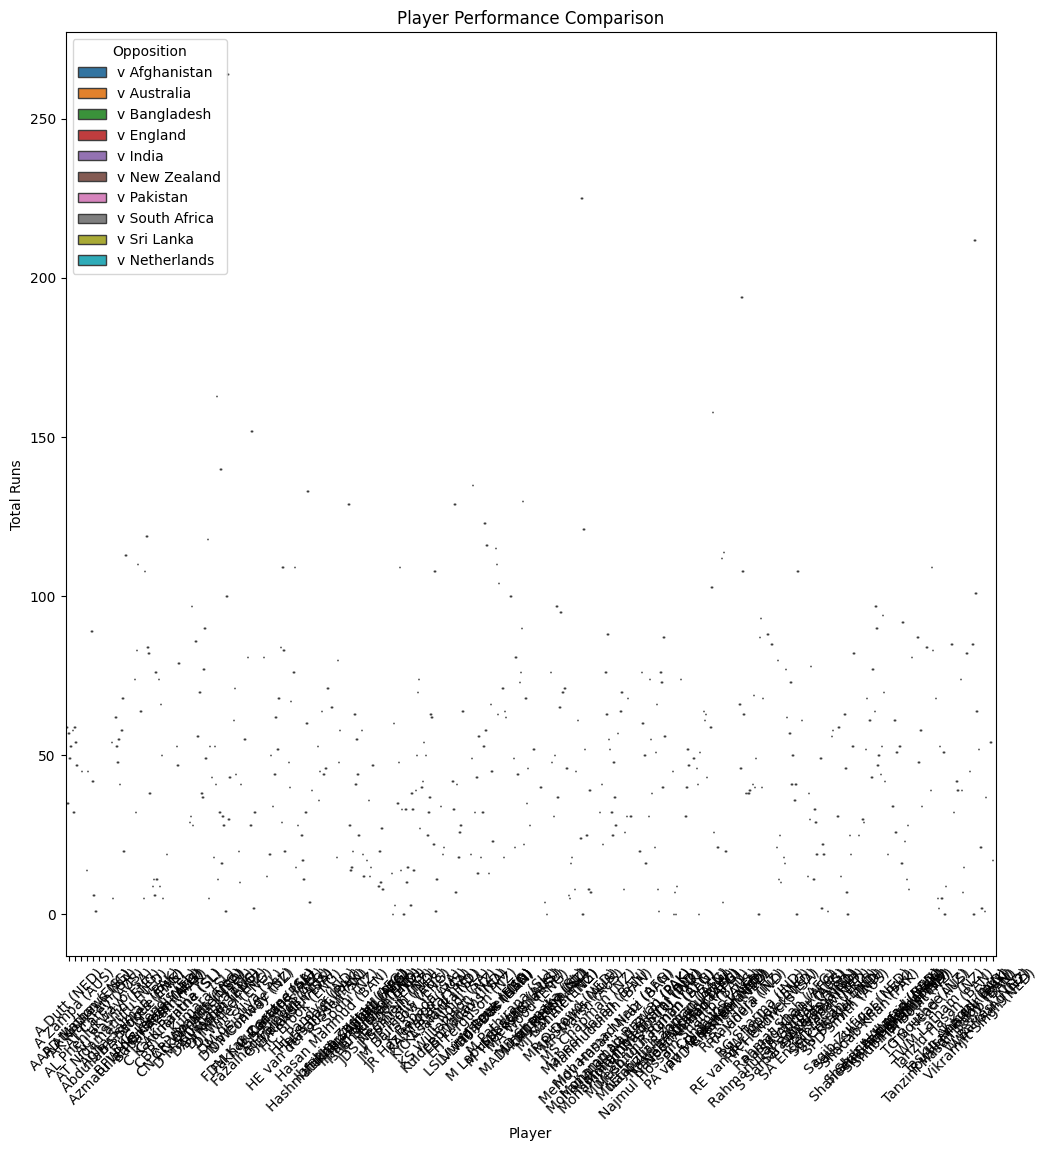

In [ ]:
# Plotting player performance
plt.figure(figsize=(12, 12))
sns.boxplot(x='player', y='runs', hue='opposition', data=player_performance)
plt.title('Player Performance Comparison')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.legend(title='Opposition')
plt.show()



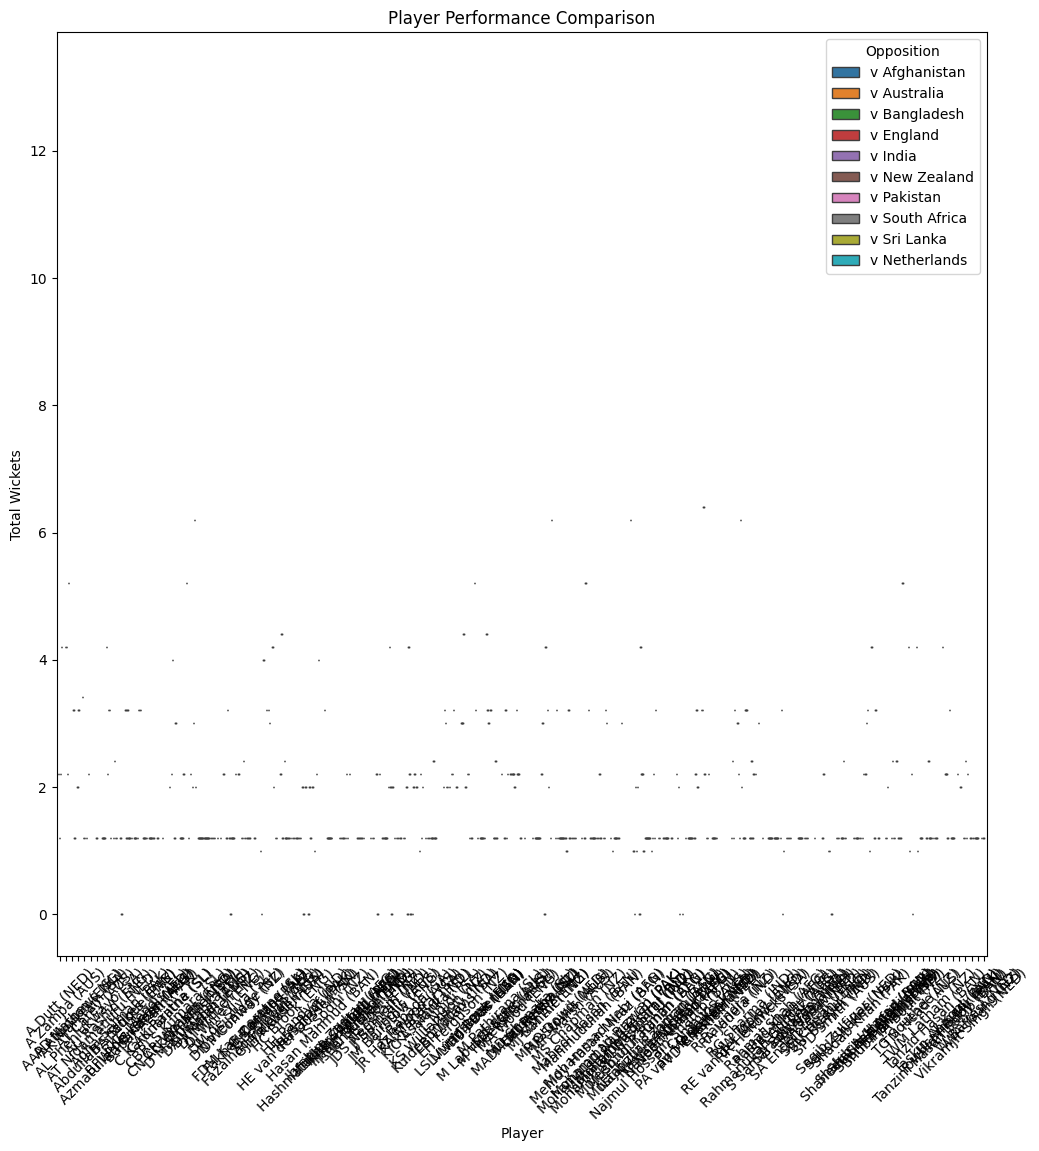

In [ ]:
plt.figure(figsize=(12, 12))
sns.boxplot(x='player', y='wkts', hue='opposition', data=player_performance)
plt.title('Player Performance Comparison')
plt.xlabel('Player')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.legend(title='Opposition')
plt.show()

**Temporal Analysis**

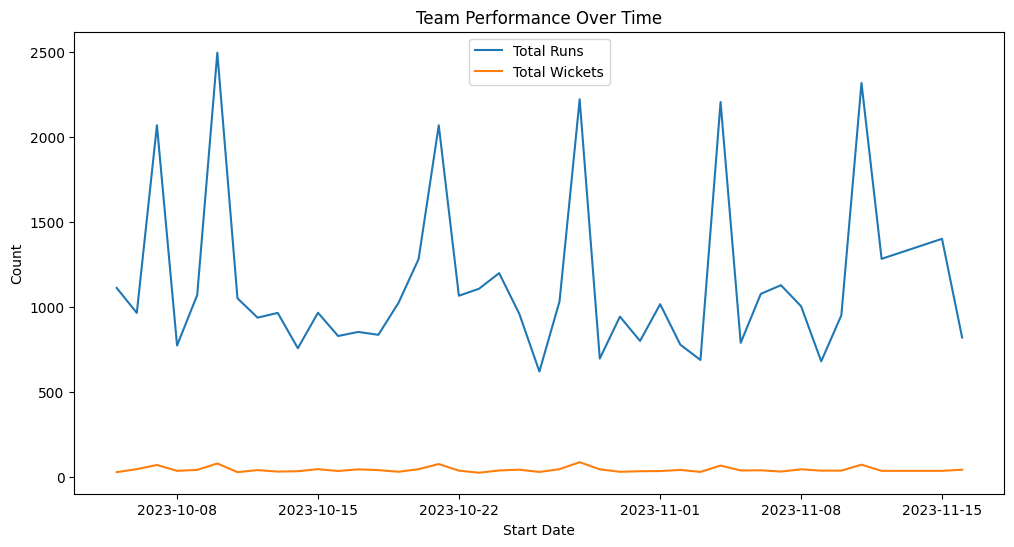

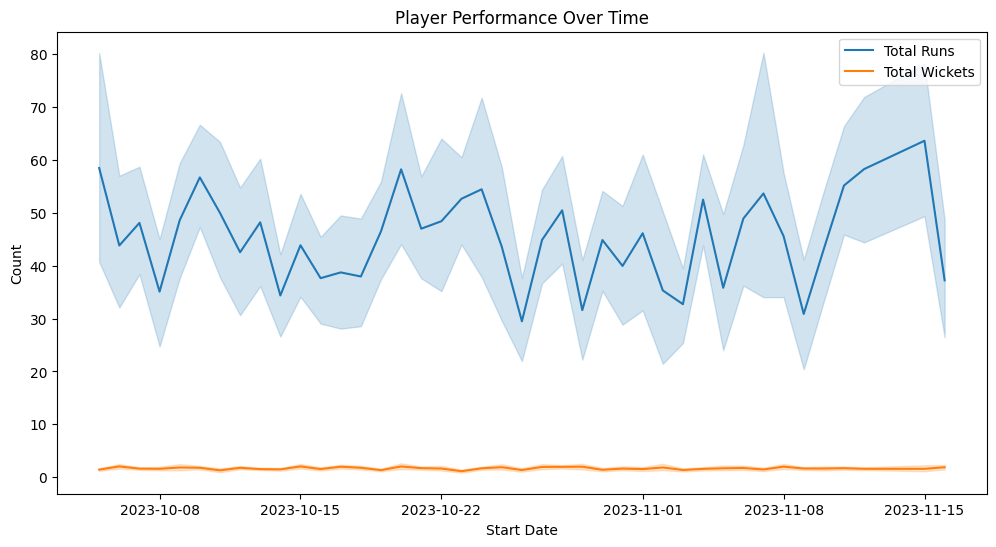

In [ ]:

# Converting 'start_date' to datetime format
df['start_date'] = pd.to_datetime(df['start_date'])

# Team performance over time
team_performance_over_time = df.groupby('start_date').agg({'runs': 'sum', 'wkts': 'sum', 'overs': 'sum'}).reset_index()

# Player performance over time
player_performance_over_time = df.groupby(['player', 'start_date']).agg({'runs': 'sum', 'wkts': 'sum', 'overs': 'sum'}).reset_index()

# Plotting team performance over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='runs', data=team_performance_over_time, label='Total Runs')
sns.lineplot(x='start_date', y='wkts', data=team_performance_over_time, label='Total Wickets')
plt.title('Team Performance Over Time')
plt.xlabel('Start Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plotting player performance over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='runs', data=player_performance_over_time, label='Total Runs')
sns.lineplot(x='start_date', y='wkts', data=player_performance_over_time, label='Total Wickets')
plt.title('Player Performance Over Time')
plt.xlabel('Start Date')
plt.ylabel('Count')
plt.legend()
plt.show()


**Model for predicting the number of runs a player might score**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Selecting relevant features and target variable
X = df[['bat_or_bowl', 'bb_bf', 'wicketball_prob', 'runs_per_ball', 'opposition', 'ground', 'start_date']]
y = df['runs']

# Convert start_date to numerical format
X['start_date'] = (X['start_date'] - X['start_date'].min()).dt.days

# Encoding categorical variables if needed
X_encoded = pd.get_dummies(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")




Mean Squared Error: 103.88921209677001


<ipython-input-101-eedbd95c015a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['start_date'] = (X['start_date'] - X['start_date'].min()).dt.days


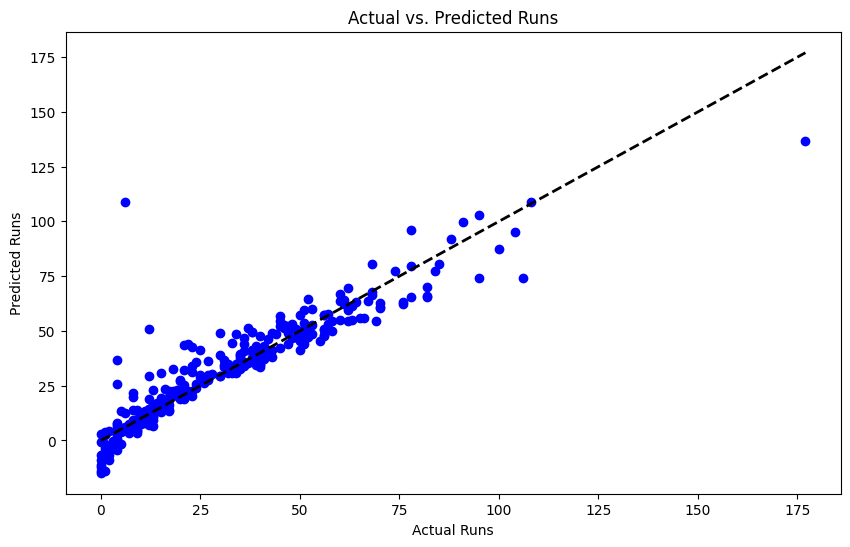

In [ ]:
import matplotlib.pyplot as plt

# Plotting predicted vs. actual runs
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Actual vs. Predicted Runs')
plt.show()


This is a scatter plot where the x-axis represents the actual runs and the y-axis represents the predicted runs. The diagonal line represents a perfect prediction where the actual and predicted values are the same. Points that fall closer to this line indicate better predictions by the model.